# Sampling

The Breast Cancer Wisconsin (Diagnostic) Dataset aims to predict whether a tumor is benign (1) or malignant (0) based on a set of features extracted from the nuclei of breast cancer cells.

The ultimate goal is to create an accurate classification model that minimizes the number of misclassifications, ensuring that the system reliably distinguishes between benign and malignant tumors to assist in early diagnosis.

The dataset is often split into a training set, where the model learns the patterns between the features and the target (tumor classification), and a test set, where the model's performance is evaluated.

# Importing Dataset

In [ ]:
from sklearn.datasets import load_breast_cancer
# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()

# Split the data into features (X) and target variable (y)
X = data.data
y = data.target

- X are the 30 features within the dataset.
- Y is the target ( benign or malignant) or in this case 0 or 1. 0 being malignant and 1 being benign.
- The split these to understand what features in X influence whether the target is benign or malignant by using various feature selections methods such as KBest and Lasso.

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

**Mean Features:
The "mean" features are the average values of various measurements for each nucleus in the sample.**

- Mean Radius: The average distance from the center to the boundary of the nucleus (a measure of size).
- Mean Texture: The average variation in gray-scale intensity values across the image (a measure of smoothness or roughness).
- Mean Perimeter: The average perimeter of the nucleus.
- Mean Area: The average area of the nucleus (another measure of size).
- Mean Smoothness: The smoothness of the nucleus edges, defined as the local variation in radius lengths (how regular the shape of the nucleus is).
- Mean Compactness:  This measures how compact or solid the shape of the nucleus is.
- Mean Concavity: Measures the severity of concave portions in the boundary of the nucleus (how much of the nucleus is indented).
- Mean Concave Points: The number of concave portions or indents in the boundary of the nucleus.
- Mean Symmetry: The symmetry of the nucleus (how similar the two halves of the nucleus are).
- Mean Fractal Dimension: A measure of the complexity of the nucleus boundary (calculated by approximating the fractal dimension of the boundary).

**Error Features:
The "error" features measure the variation or standard error of the corresponding "mean" features. These indicate the level of variability in the measurements across different nuclei in the same image.**

- Radius Error: The standard deviation of the radius measurements across the nuclei.
- Texture Error: The standard deviation of texture measurements across the nuclei.
- Perimeter Error: The standard deviation of the perimeter measurements.
- Area Error: The standard deviation of the area measurements.
- Smoothness Error: The standard deviation of the smoothness values across nuclei.
- Compactness Error: The standard deviation of compactness values across nuclei.
- Concavity Error: The standard deviation of concavity values.
- Concave Points Error: The standard deviation of the number of concave points.
- Symmetry Error: The standard deviation of symmetry values.
- Fractal Dimension Error: The standard deviation of fractal dimension values.

**Worst Features:
The "worst" features refer to the worst (largest) value for each of these measurements across all nuclei in a given image. This captures the extreme cases in the sample, which are often indicative of abnormalities.**

- Worst Radius: The largest radius among all nuclei in the image.
- Worst Texture: The highest texture value (most variation in gray-scale intensity).
- Worst Perimeter: The largest perimeter measurement.
- Worst Area: The largest area measurement.
- Worst Smoothness: The highest value of smoothness.
- Worst Compactness: The highest compactness value.
- Worst Concavity: The largest concavity value (deepest indentations in the nuclei).
- Worst Concave Points: The largest number of concave points (sharp indentations).
- Worst Symmetry: The largest symmetry value (most asymmetric nuclei).
Worst Fractal Dimension: The highest fractal dimension (most complex nucleus boundary).

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

The is the target to determine whether the tumor is benign or malignant, by looking at the 30 features.
- Malignant means cancerous = 0
- Benign means non-cancerous = 1

# Creating Dataframe

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()

# Create a DataFrame with features and target
df_breastcancer = pd.DataFrame(data.data, columns=data.feature_names)
df_breastcancer['target'] = data.target

# Display the first few rows of the dataset
print(df_breastcancer.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

- Created a dataframe to better visualize the breast cancer dataset

# Data Exploration

In [ ]:
df_breastcancer.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [ ]:
df_breastcancer.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


- There are no missing values within the dataset

In [ ]:
df_breastcancer.isna().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


- There are no missing values within the dataset

In [ ]:
df_breastcancer.dtypes

,0
mean radius,float64
mean texture,float64
mean perimeter,float64
mean area,float64
mean smoothness,float64
mean compactness,float64
mean concavity,float64
mean concave points,float64
mean symmetry,float64
mean fractal dimension,float64


In [ ]:
df_breastcancer['target']=df_breastcancer['target'].astype('category')

- Changed the target from int64 to categorical target as either the tumor is benign or malignant.

In [ ]:
df_breastcancer.dtypes

,0
mean radius,float64
mean texture,float64
mean perimeter,float64
mean area,float64
mean smoothness,float64
mean compactness,float64
mean concavity,float64
mean concave points,float64
mean symmetry,float64
mean fractal dimension,float64


# Univariate Analysis

In [ ]:
target_counts = df_breastcancer['target'].value_counts()
print(target_counts)

target
1    357
0    212
Name: count, dtype: int64


- There are 212 malignant tumors within the dataset, which classified by 0
- There are 357 benign tumors within the dataset, which is classified by 1

## Histogram of Benign and Maligant Tumor Count

target
1    357
0    212
Name: count, dtype: int64


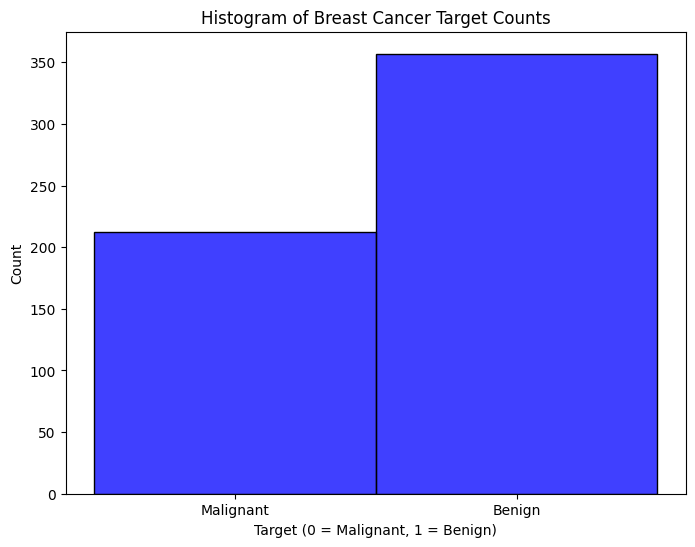

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each target class
target_counts = df_breastcancer['target'].value_counts()
print(target_counts)

# Plot the histogram of target counts
plt.figure(figsize=(8, 6))
sns.histplot(df_breastcancer['target'], bins=2, kde=False, color='blue')
plt.title('Histogram of Breast Cancer Target Counts')
plt.xlabel('Target (0 = Malignant, 1 = Benign)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Malignant', 'Benign'])
plt.show()


## Pie Chart of Benign vs Malignant Tumors

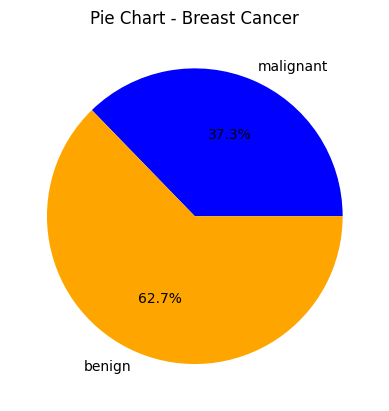

In [ ]:
# Count the number of samples per species
value_counts = [sum(data.target == i) for i in range(len(data.target_names))]

#define color list
colors = ['blue', 'orange']

# Pie chart of species proportions
plt.pie(value_counts, labels=data.target_names, colors=colors, autopct='%1.1f%%')

# Customize plot
plt.title('Pie Chart - Breast Cancer')

# Show the plot
plt.show()

- 62.7% of the tumors are benign and 37.3% of the tumors are malignant, within the dataset

## Summary of BreastCancer Dataset

In [ ]:
df_breastcancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Histograms of All the Features

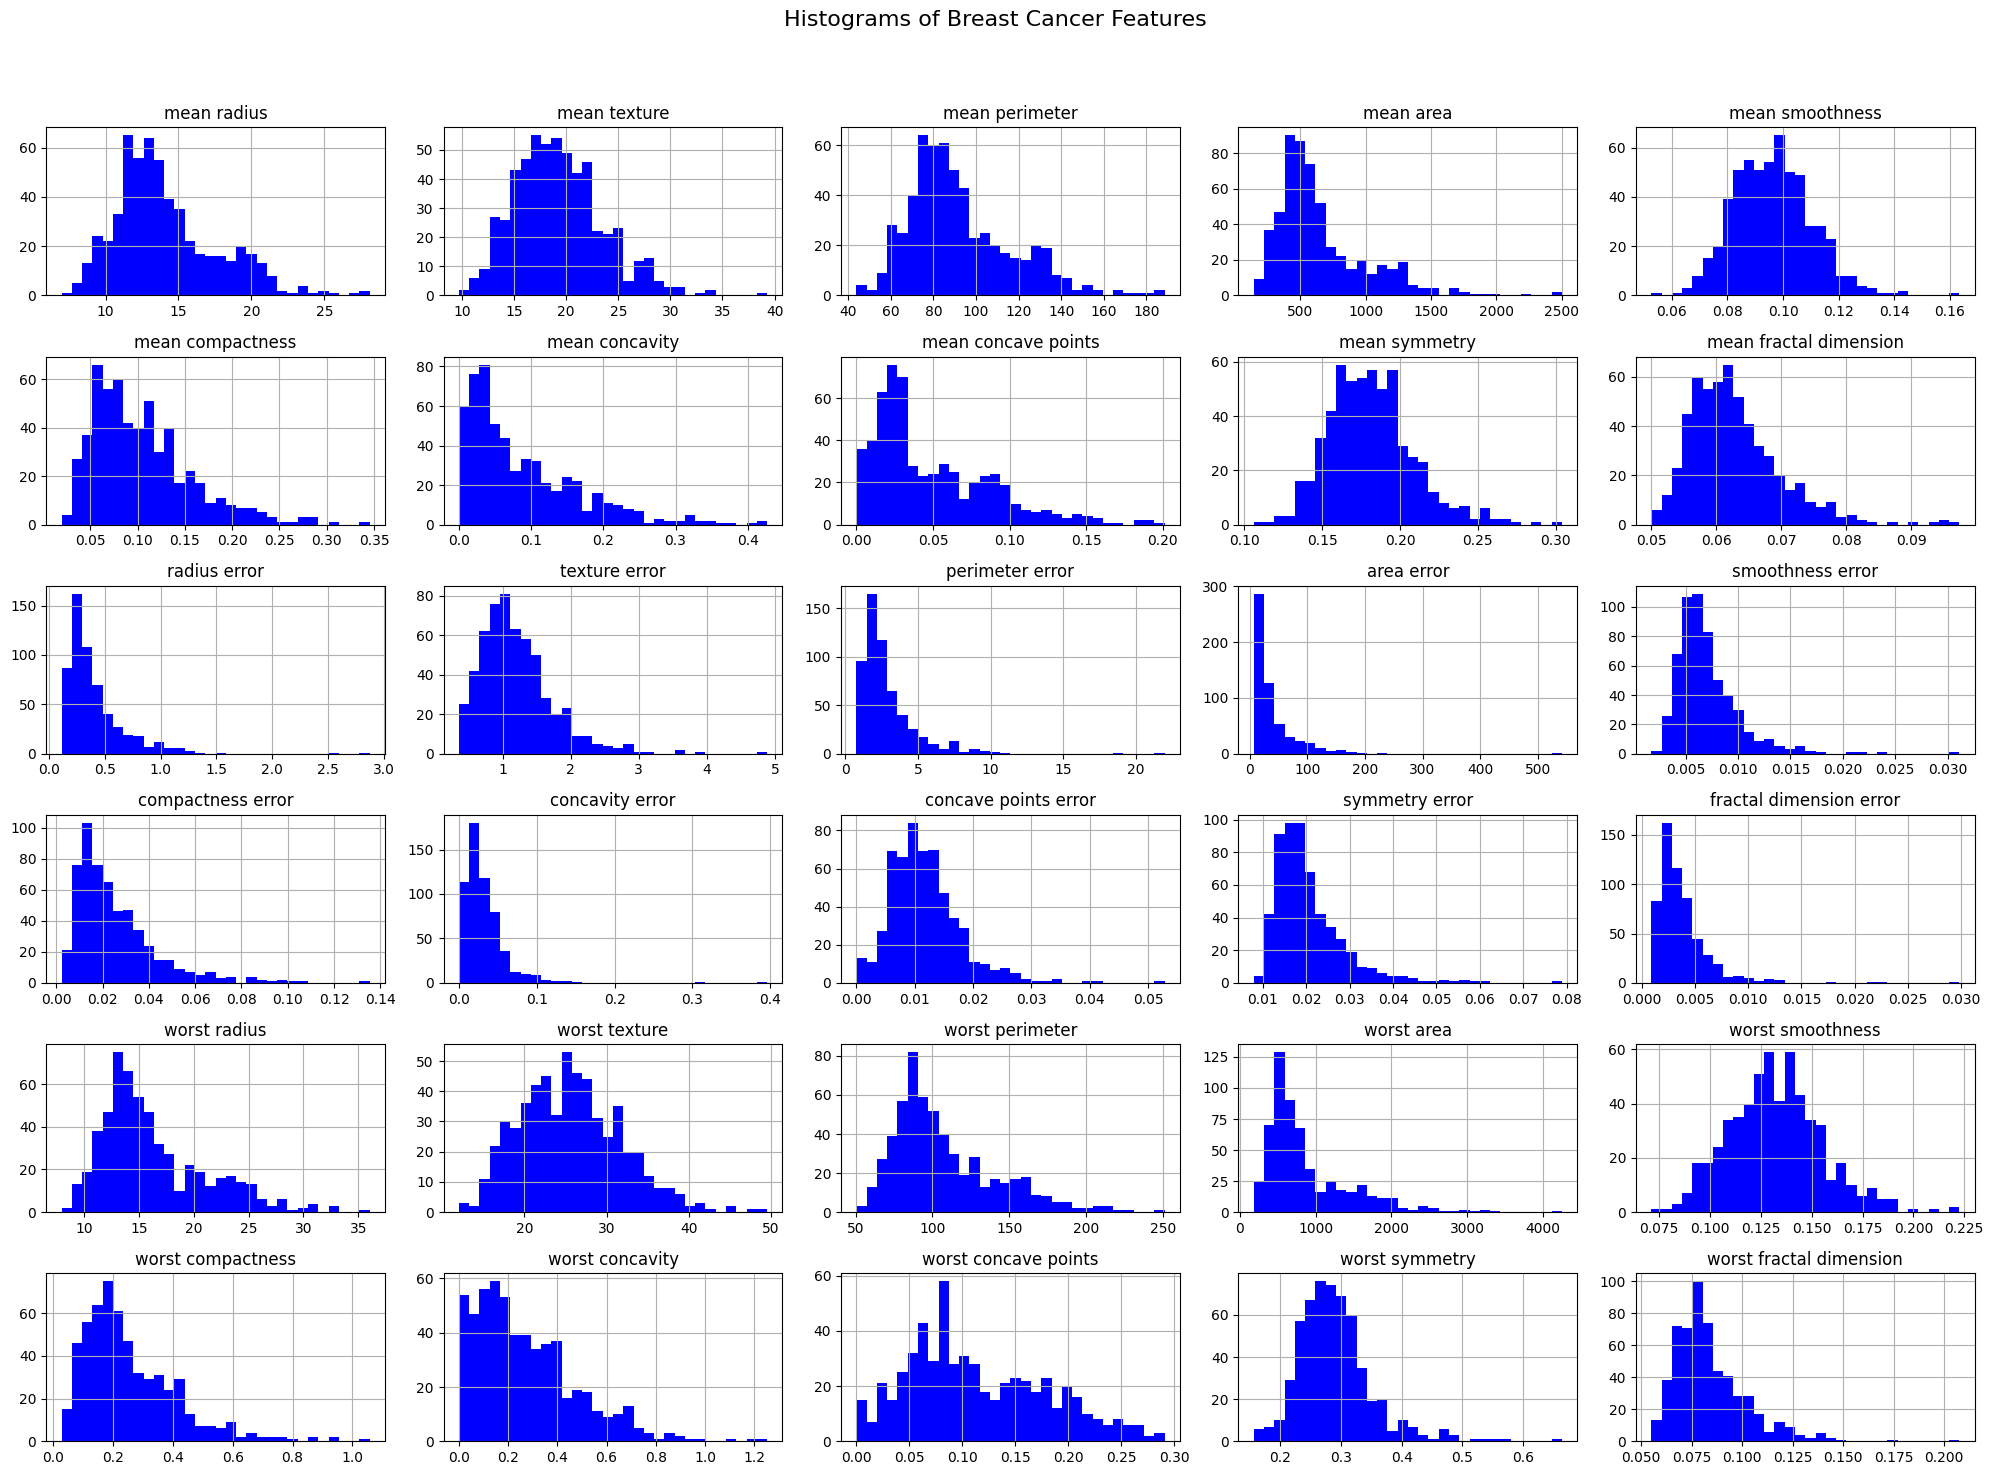

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms for each variable in the df_breastcancer DataFrame
df_breastcancer.hist(bins=30, figsize=(20, 15), color='blue')
plt.suptitle('Histograms of Breast Cancer Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the layout so the title doesn't overlap
plt.show()


**Mean Features:**
- Mean Radius, Mean Perimeter, Mean Area: These distributions are right-skewed (positively skewed), where the bulk of the data is concentrated on the left, and fewer values are stretched toward the right.
- Mean Texture, Mean Smoothness, Mean Symmetry: These features have distributions that are closer to normal or approximately symmetric, although with some slight skewness. Most values are centered around the mean, with fewer outliers on either side.
- Mean Compactness, Mean Concavity, Mean Concave Points, Mean Fractal Dimension: These distributions are right-skewed, with a majority of small values and a few larger outliers.

**Error Features (Standard Error):**
- Radius Error, Perimeter Error, Area Error: These features are highly right-skewed, with a large concentration of small values and a long tail toward the larger values.
- Texture Error, Smoothness Error, Symmetry Error: These have distributions that appear right-skewed but not as extreme as other error features. The majority of the values are small, with fewer larger values.
- Compactness Error, Concavity Error, Concave Points Error: Highly right-skewed distributions with many low values and a few large outliers.
- Fractal Dimension Error: This feature also has a right-skewed distribution but is more compact compared to other error features.

**Worst Features:**
- Worst Radius, Worst Perimeter, Worst Area: These features follow a right-skewed distribution, similar to their corresponding "mean" features but with a more significant spread in values.
- Worst Texture, Worst Smoothness, Worst Symmetry: These distributions are roughly normal but may have slight skewness. They show a bell curve with most values centered around the middle.
- Worst Compactness, Worst Concavity, Worst Concave Points: These are right-skewed distributions, with most values on the lower end and a few extreme outliers.
- Worst Fractal Dimension: This feature shows a right-skewed distribution, but it is less extreme compared to other worst-case features.

## Boxplots of All the Features

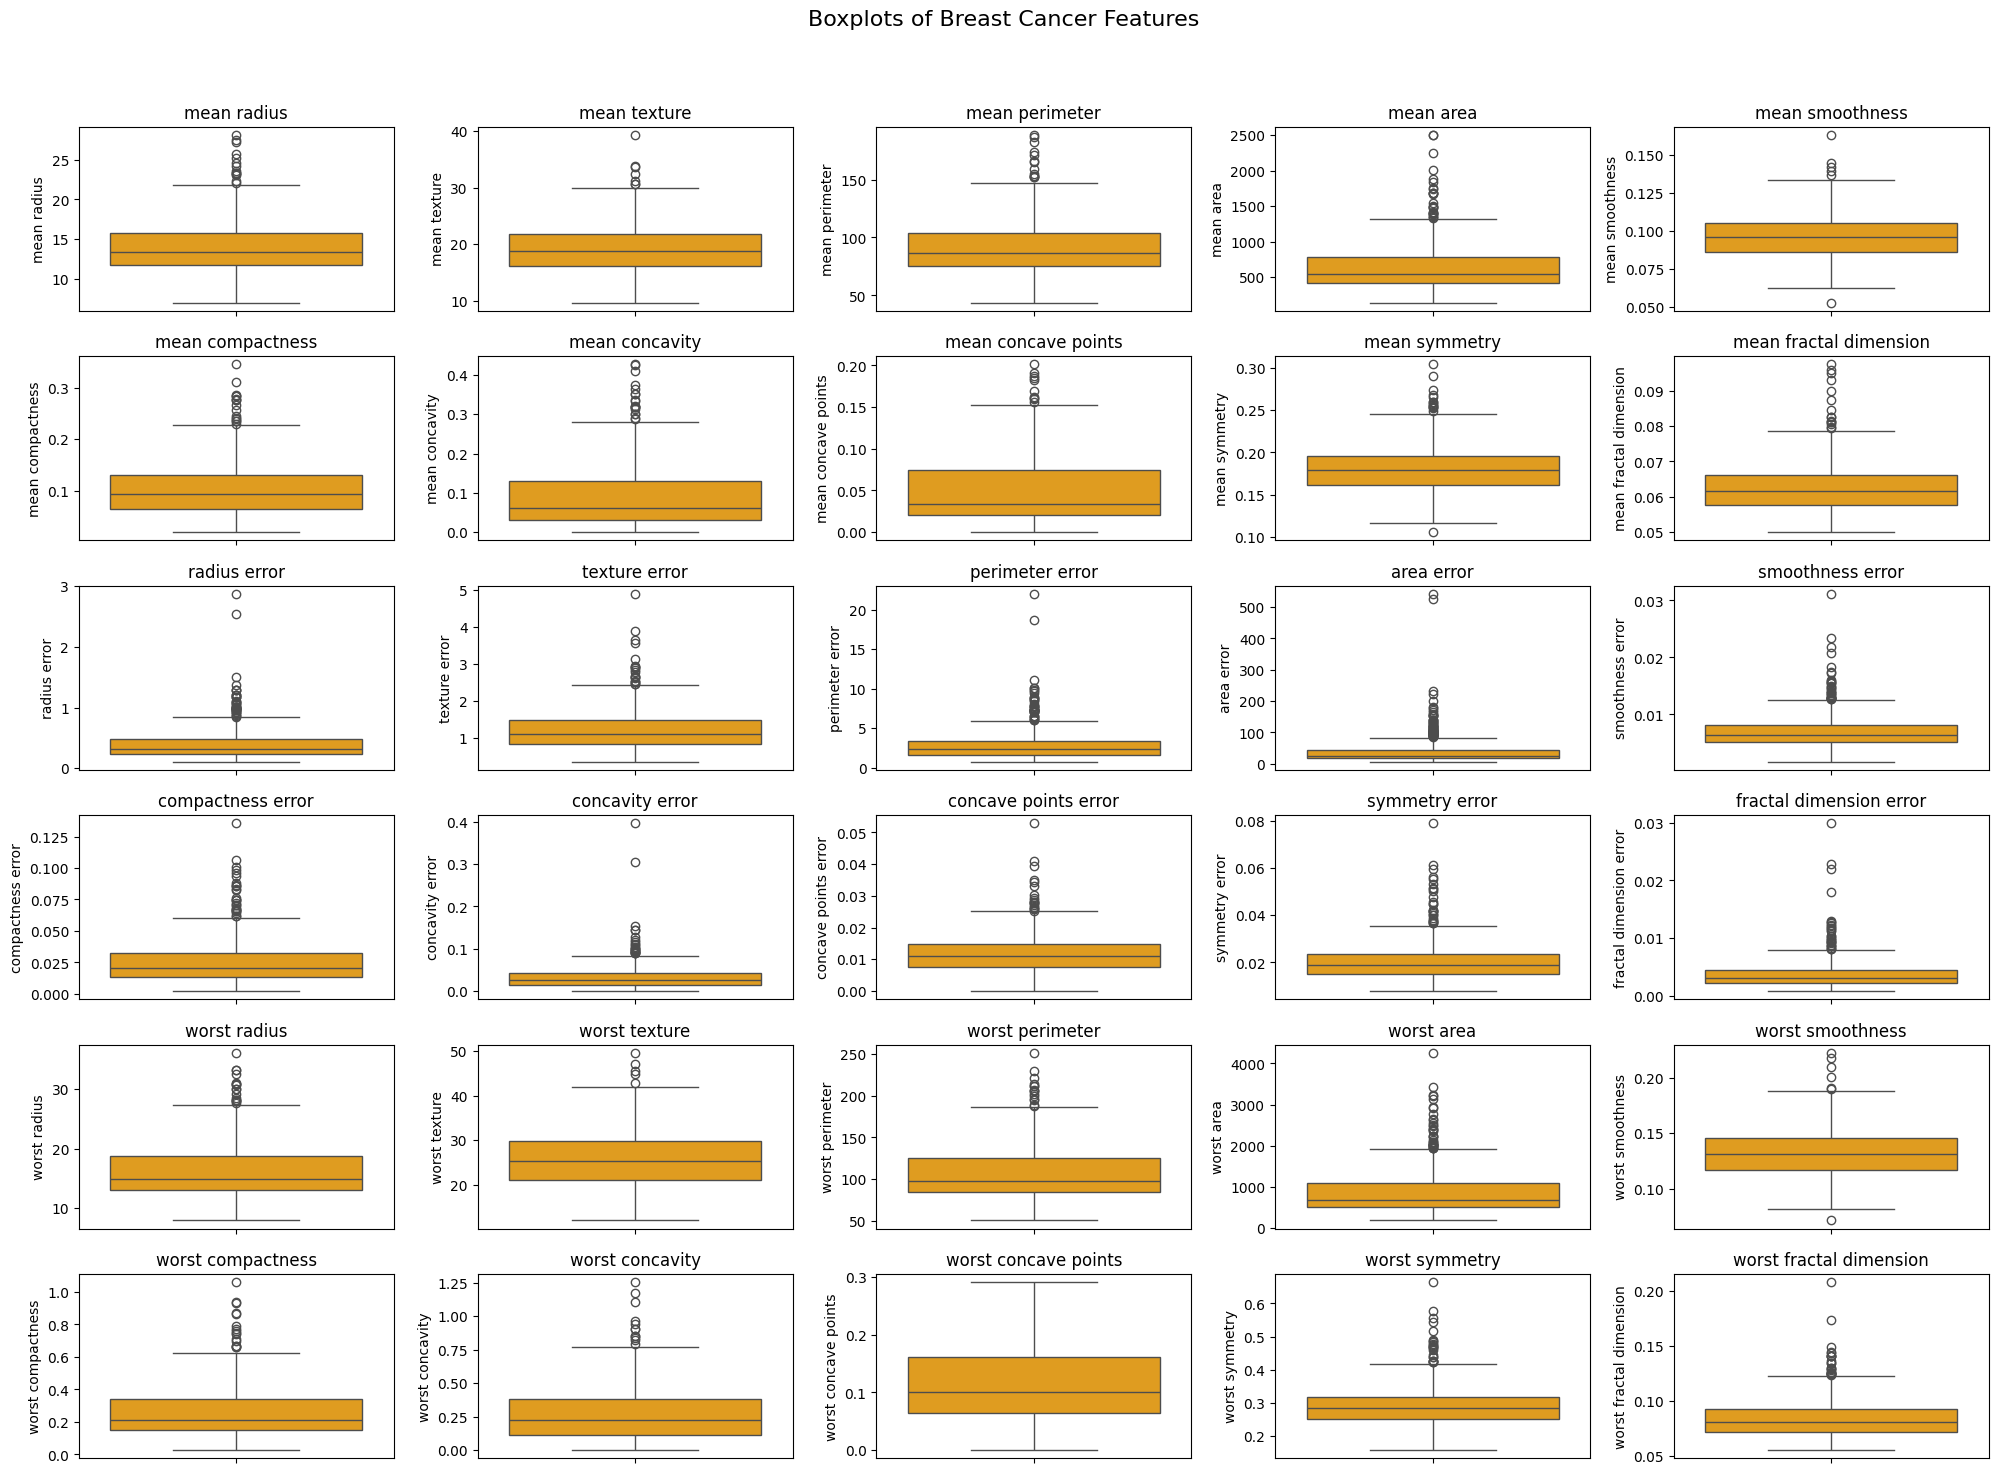

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots for each variable in the df_breastcancer DataFrame
plt.figure(figsize=(20, 15))

# Iterate over each feature and create a boxplot
for i, column in enumerate(df_breastcancer.columns[:-1]):  # Exclude the 'target' column
    plt.subplot(6, 5, i + 1)  # Create subplots (6 rows x 5 columns grid)
    sns.boxplot(data=df_breastcancer[column], color='orange')
    plt.title(column)

plt.suptitle('Boxplots of Breast Cancer Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout so the title doesn't overlap
plt.show()


**1. Mean Features:Mean Radius, Perimeter, Area:**

These features have a wide range of values, with several outliers above the upper whiskers. This indicates that some samples have unusually large values for these features compared to others.

**Mean Compactness, Concavity, Symmetry, Fractal Dimension:**
These features are more tightly distributed around their medians, but a few outliers are present. The distributions are relatively narrow, meaning most of the data points are close to each other in terms of these characteristics.

**Mean Smoothness:**
This feature shows a very tight distribution with minimal outliers, suggesting that most samples have similar smoothness values.

2. **Error Features (e.g., Radius Error, Area Error):**
Area Error, Perimeter Error, and Radius Error:
These have some extreme outliers, indicating that some samples exhibit significantly higher variability in these measurements.

**Texture Error, Compactness Error, and Concavity Error:**
These features have a more consistent distribution with fewer outliers, indicating less variability across samples.

3. **Worst Features: Worst Radius, Perimeter, and Area:**

These are similar to their respective mean features, with a wide distribution and several high outliers. The spread suggests that these "worst" values (i.e., the largest measurements for each sample) vary significantly across patients.

**Worst Concavity and Compactness:**
The distribution here is narrower compared to area-related features, but still shows some significant outliers.

**Worst Symmetry and Fractal Dimension:**
These features have a narrow spread and a small number of outliers, indicating that the worst symmetry and fractal dimension do not vary much between samples.

# Bivariate Analysis

## Correlation Matrix

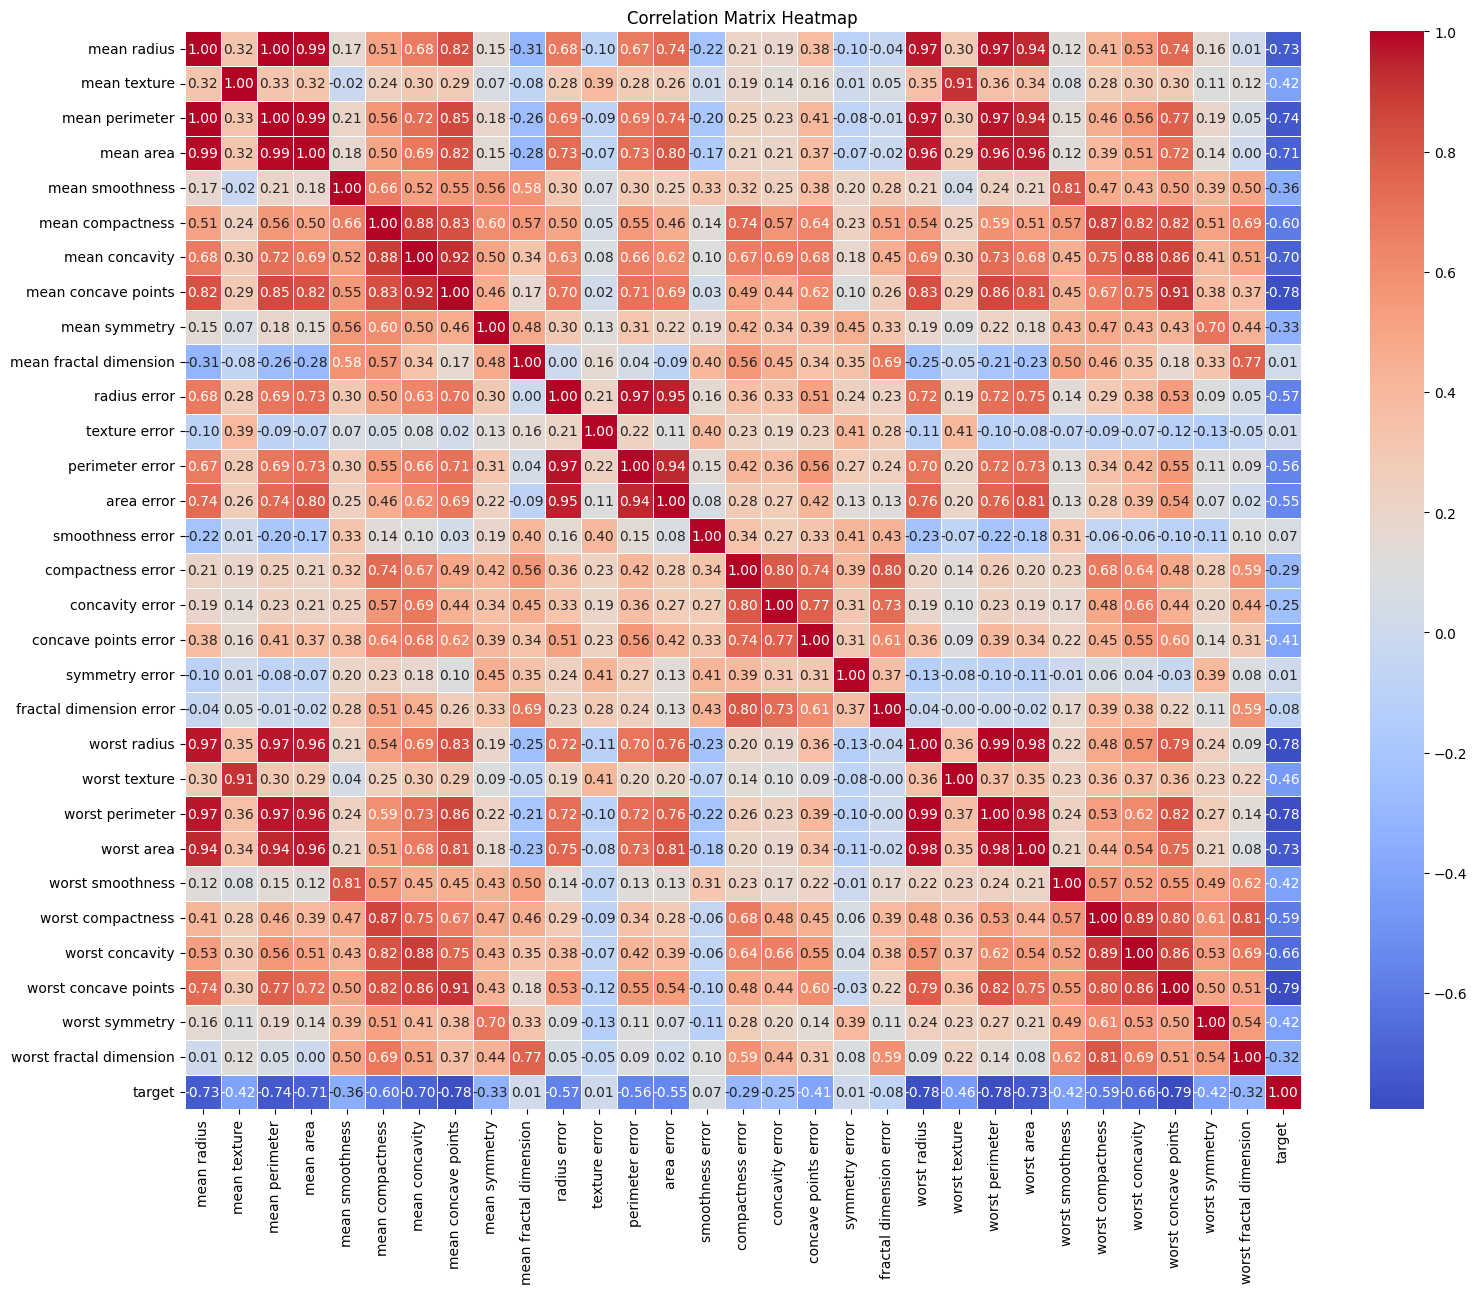

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df_breastcancer.corr()

# Set the size of the plot to be larger
plt.figure(figsize=(18, 14))  # Adjust width and height as needed

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title and labels
plt.title('Correlation Matrix Heatmap')
plt.show()


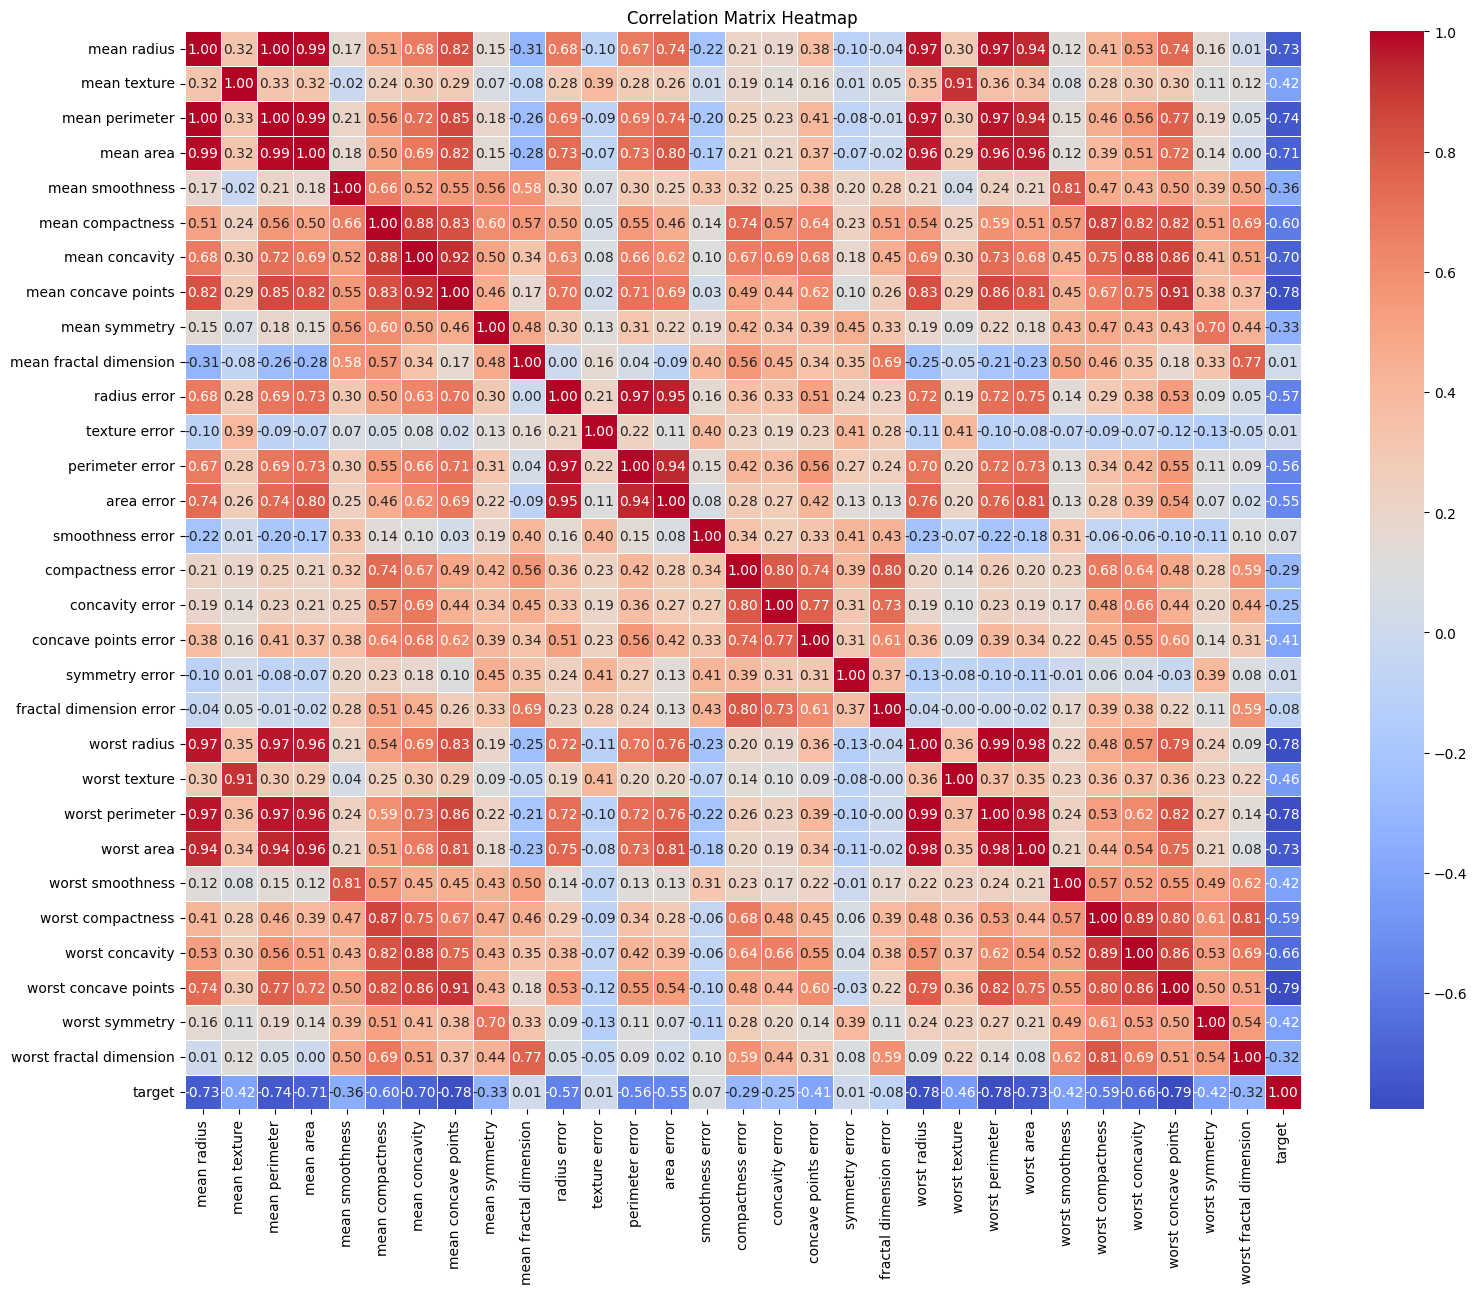

Highest correlation (absolute value): 0.9978552814938109 between ('mean radius', 'mean perimeter')
Lowest correlation (absolute value): 0.0001109950726296278 between ('mean fractal dimension', 'radius error')


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute the correlation matrix
correlation_matrix = df_breastcancer.corr()

# Set the size of the plot to be larger
plt.figure(figsize=(18, 14))  # Adjust width and height as needed

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title and labels
plt.title('Correlation Matrix Heatmap')
plt.show()

# Find the highest and lowest correlations in absolute values (excluding diagonal)
correlation_matrix_abs = correlation_matrix.abs()

# Remove diagonal (self-correlations)
np.fill_diagonal(correlation_matrix_abs.values, np.nan)

# Find highest and lowest correlations
max_corr = correlation_matrix_abs.max().max()  # Highest absolute correlation
min_corr = correlation_matrix_abs.min().min()  # Lowest absolute correlation

# Find the feature pairs with the highest and lowest correlations
max_pair = correlation_matrix_abs.stack().idxmax()  # Feature pair with highest correlation
min_pair = correlation_matrix_abs.stack().idxmin()  # Feature pair with lowest correlation

print(f"Highest correlation (absolute value): {max_corr} between {max_pair}")
print(f"Lowest correlation (absolute value): {min_corr} between {min_pair}")


**Correlation with the Target:**
- **Highest Correlation with Target:**
The feature worst radius has the highest positive correlation with the target, with a correlation value of 0.79.
- **Lowest Correlation with Target:**
The feature fractal dimension error has the lowest correlation with the target, with a correlation value of -0.08.
- This suggests that worst radius is a significant predictor of the target outcome (whether the tumor is benign or malignant), while fractal dimension error provides little predictive value.
- **High positive correlation** with the target means that as the feature value increases, the likelihood of malignancy increases. For instance, worst radius (0.78) and mean radius (0.73) are strongly positively correlated with malignancy.
- **High negative correlation** with the target means that as the feature value increases, the likelihood of malignancy decreases. For example, worst concave points (-0.79) is highly negatively correlated, meaning lower values of this feature are associated with benign tumors.

**From the correlation matrix, we can observe the highest and lowest correlations across all features:**

- **Highest Correlation:**
The highest positive correlation is between mean radius and mean perimeter, with a correlation of 0.99.
This means that as the radius of a tumor increases, its perimeter almost always increases proportionally. These two features are highly related and almost represent the same underlying measurement of tumor size.

- **Lowest (Most Negative) Correlation:**
The lowest (most negative) correlation is between mean fractctal dimension and raduis error, with a correlation of 0.0001. Since these two features have a near-zero correlation, it suggests that the tumor boundary complexity and the variability in the tumor radius measurement do not move together and do not influence each other in a linear manner.


## Scatterplot of Highest Correlation and Lowest Correlation

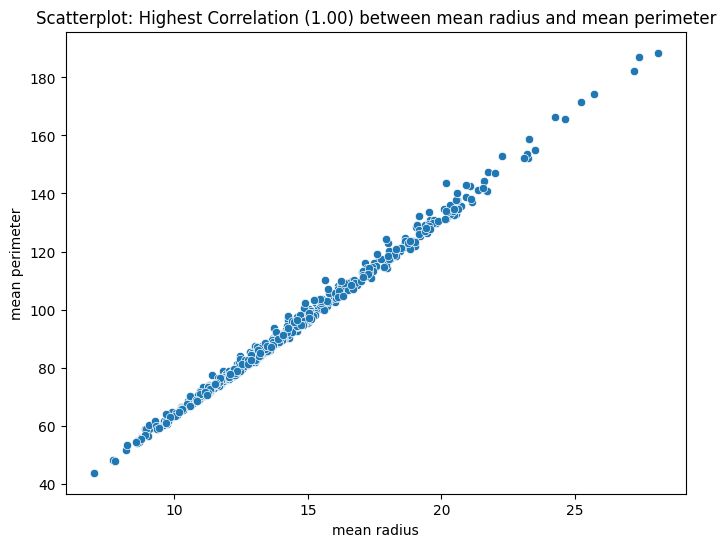

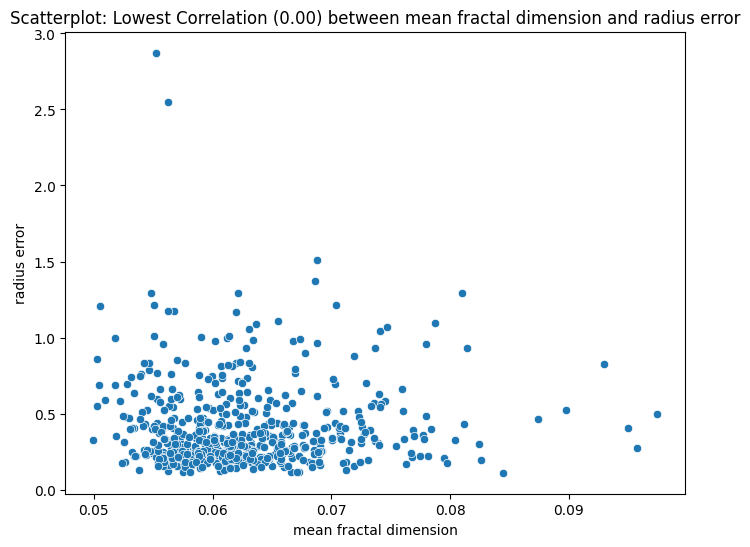

In [ ]:
# Highest correlation scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_breastcancer[max_pair[0]], y=df_breastcancer[max_pair[1]])
plt.title(f'Scatterplot: Highest Correlation ({max_corr:.2f}) between {max_pair[0]} and {max_pair[1]}')
plt.xlabel(max_pair[0])
plt.ylabel(max_pair[1])
plt.show()

# Lowest correlation scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_breastcancer[min_pair[0]], y=df_breastcancer[min_pair[1]])
plt.title(f'Scatterplot: Lowest Correlation ({min_corr:.2f}) between {min_pair[0]} and {min_pair[1]}')
plt.xlabel(min_pair[0])
plt.ylabel(min_pair[1])
plt.show()

**Scatterplot 1:**

The scatterplot shows the relationship between mean radius (x-axis) and mean perimeter (y-axis), with a perfect correlation of 1.00. This means that these two features are linearly dependent, and one can be perfectly predicted from the other.

Perfect Linear Relationship:
The points form a straight line, indicating that as the mean radius increases, the mean perimeter increases proportionally. This is expected, as the perimeter of a shape is directly related to its radius, especially in circular or similarly shaped tumors.

**Scatterplot 2**

No Correlation (0.00):

The plot suggests that there is no clear pattern or linear relationship between mean fractal dimension and radius error. The points are scattered in such a way that increases or decreases in one feature do not correspond to any noticeable trend in the other feature.
Spread of Data:

Most of the data points for radius error are clustered between 0.0 and 1.0, indicating that the majority of samples have relatively low radius error values.
Mean fractal dimension values are mostly between 0.05 and 0.08, but the scatter of radius error values appears consistent across this range.
Outliers:

There are a few outliers, particularly for radius error, where some points reach as high as 2.5 to 3.0. These outliers represent cases where the error in measuring the radius is significantly higher than the rest of the dataset.
However, these outliers are distributed across various values of mean fractal dimension, further supporting the lack of correlation.

## Scatterplot of Highest Correlation with the Target

Highest correlation with target: 0.79 for feature: worst concave points


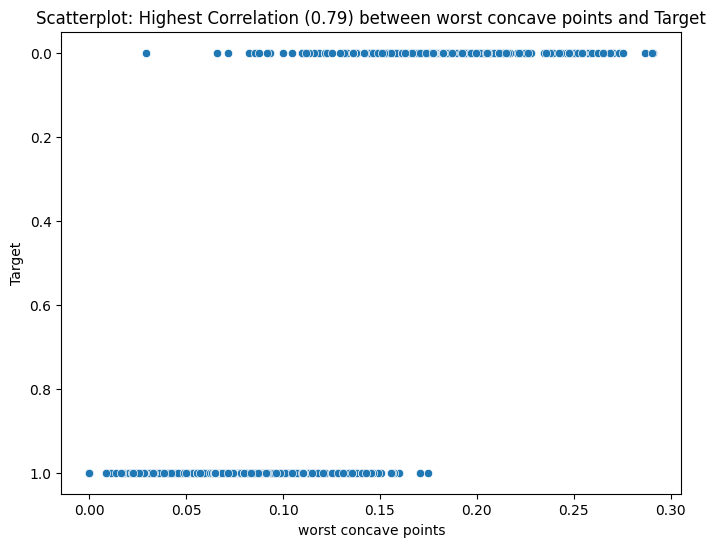

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get the absolute correlation with the target (assuming 'target' is the target column)
correlation_with_target = correlation_matrix['target'].abs()

# Remove self-correlation (correlation of target with itself)
correlation_with_target = correlation_with_target.drop('target')

# Find the feature with the highest correlation with the target
max_corr_feature = correlation_with_target.idxmax()
max_corr_value = correlation_with_target.max()

print(f"Highest correlation with target: {max_corr_value:.2f} for feature: {max_corr_feature}")

# Plot the scatterplot for the feature with the highest correlation with the target
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_breastcancer[max_corr_feature], y=df_breastcancer['target'])
plt.title(f'Scatterplot: Highest Correlation ({max_corr_value:.2f}) between {max_corr_feature} and Target')
plt.xlabel(max_corr_feature)
plt.ylabel('Target')
plt.show()


**Strong Correlation (0.79):**

- The correlation between worst concave points and the target is 0.79, indicating a strong positive correlation. This means that as the value of worst concave points increases, the likelihood of the tumor being malignant (target = 0) also increases.
Separation of Classes:

- The data points for benign tumors (target = 1) are clustered near the lower range of worst concave points (close to 0.0 to 0.10).
Malignant tumors (target = 0) have a wider spread, with worst concave points ranging from around 0.05 to as high as 0.30.

- A few outliers exist in both classes, particularly some malignant cases with low worst concave points values, and benign cases with slightly higher worst concave points. These could be more difficult to classify and might benefit from additional features or models to improve accuracy.

Second-highest correlation with target: 0.78 for feature: worst perimeter


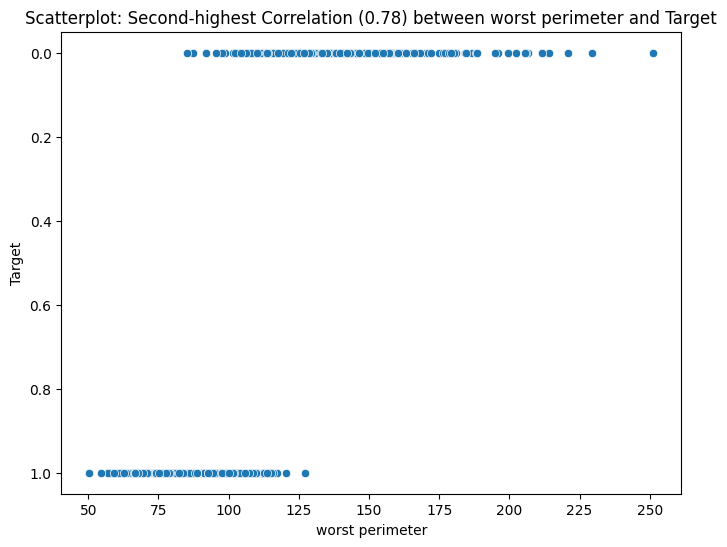

In [ ]:
#Get the absolute correlation with the target (assuming 'target' is the name of the target column)
correlation_with_target = correlation_matrix['target'].abs()

# Remove self-correlation (correlation of target with itself)
correlation_with_target = correlation_with_target.drop('target')

# Sort correlations in descending order
sorted_corr = correlation_with_target.sort_values(ascending=False)

# Get the second-highest correlation
second_max_corr_feature = sorted_corr.index[1]
second_max_corr_value = sorted_corr.iloc[1]

print(f"Second-highest correlation with target: {second_max_corr_value:.2f} for feature: {second_max_corr_feature}")

# Plot the scatterplot for the feature with the second-highest correlation with the target
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_breastcancer[second_max_corr_feature], y=df_breastcancer['target'])
plt.title(f'Scatterplot: Second-highest Correlation ({second_max_corr_value:.2f}) between {second_max_corr_feature} and Target')
plt.xlabel(second_max_corr_feature)
plt.ylabel('Target')
plt.show()

Separation by Tumor Type:

- Most of the data points for malignant tumors (target = 0) are located across a wide range of worst perimeter values.
Benign tumors (target = 1) are mainly clustered in the lower worst perimeter values, closer to the left side of the plot.

Correlation:
- As worst perimeter increases, it is more likely that the tumor is malignant (target = 0), which aligns with the relatively strong correlation value of 0.78.

**Hypothesis:** **The worst perimeter and worst concave points are significantly associated with tumor classification.**



# Multivariate Analysis

## Scatterplot of Mean Concave Points and Worst Perimeter colored by Tumor Classification

Correlation between 'worst perimeter' and 'mean concave points': 0.8559231281343108


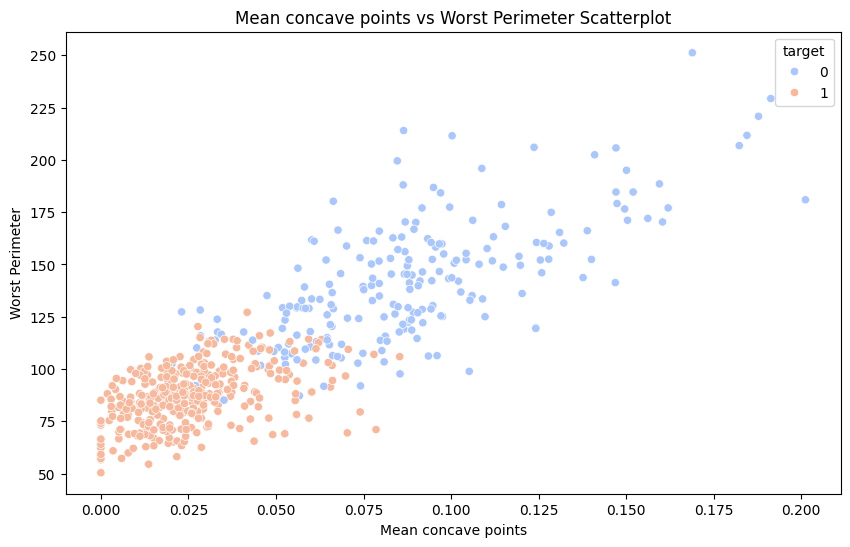

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the breast cancer dataset
data = load_breast_cancer()

# Create a DataFrame from the data
df_breastcancer = pd.DataFrame(data=data.data, columns=data.feature_names)

# Add the target variable to the DataFrame
df_breastcancer['target'] = data.target

import matplotlib.pyplot as plt
import seaborn as sns

#Calculate the correlation
correlation = df_breastcancer['worst perimeter'].corr(df_breastcancer['mean concave points'])
print(f"Correlation between 'worst perimeter' and 'mean concave points': {correlation}")

# Plotting the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_breastcancer,
                x='mean concave points',
                y='worst perimeter',
                hue='target',
                palette='coolwarm')

plt.title('Mean concave points vs Worst Perimeter Scatterplot')
plt.xlabel('Mean concave points')
plt.ylabel('Worst Perimeter')
plt.show()



**Scatterplot Interpretation:**

- **Clustering of Benign Tumors:** The orange points are clustered in the lower-left part of the graph. These tumors tend to have lower values for both mean concave points and worst perimeter, meaning they likely have smoother shapes and smaller overall perimeters.
- **Clustering of Malignant Tumors:** The blue points spread across the plot, with many having higher values for both features. These tumors tend to have larger perimeters and more concave points, indicative of irregular, non-smooth boundaries that are characteristic of malignant growths.

**Overall observation:**
- Tumors that have fewer concave points and smaller perimeters tend to be benign.
- Tumors with more concave points and larger perimeters are strongly associated with malignancy.

## Scatterplot of Mean Raduis vs Mean Perimeter colored by Target

Correlation between 'mean radius' and 'mean perimeter': 0.9978552814938105


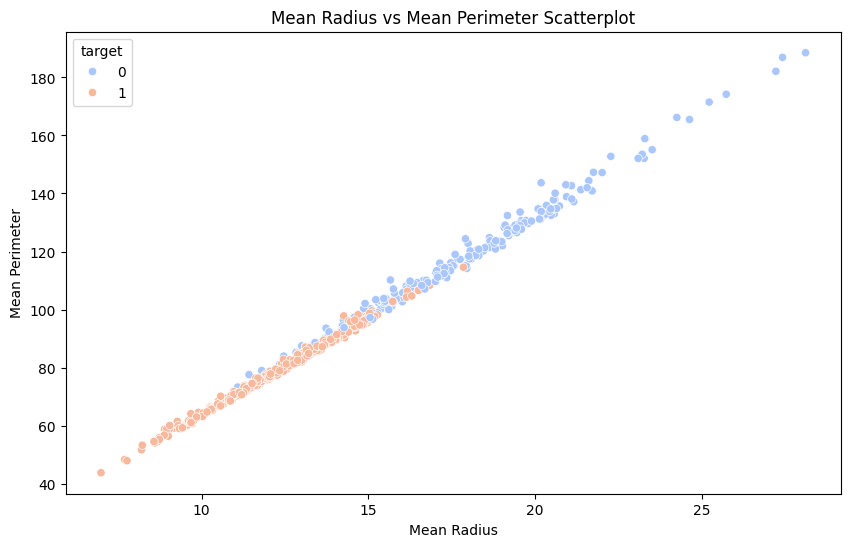

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the breast cancer dataset
data = load_breast_cancer()

# Create a DataFrame from the data
df_breastcancer = pd.DataFrame(data=data.data, columns=data.feature_names)

# Add the target variable to the DataFrame
df_breastcancer['target'] = data.target

# Calculate the correlation between 'mean radius' and 'mean perimeter'
correlation = df_breastcancer['mean radius'].corr(df_breastcancer['mean perimeter'])
print(f"Correlation between 'mean radius' and 'mean perimeter': {correlation}")

# Plotting the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_breastcancer,
                x='mean radius',
                y='mean perimeter',
                hue='target',
                palette='coolwarm')

plt.title('Mean Radius vs Mean Perimeter Scatterplot')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Perimeter')
plt.show()


- Positive Correlation: There is still a strong positive correlation between Mean Radius and Mean Perimeter. As the radius of a tumor increases, its perimeter increases as well.

Cluster Separation:

- Malignant tumors (blue): Tend to be spread across a wider range of both small and large values of radius and perimeter. This suggests that malignant tumors can have more variation in their size.
- Benign tumors (orange): Mostly cluster at the lower end of both the radius and perimeter values, indicating that benign tumors tend to be smaller in size.

- Overlap: There is an overlap between malignant (blue) and benign (orange) tumors, especially at the lower radius and perimeter values. This means that for smaller tumors, it might be harder to distinguish between benign and malignant using just these two features.



## Scatterplot of Mean Area and Mean Concavity colored by Target

Correlation between 'mean area' and 'mean concavity': 0.6859828285519114


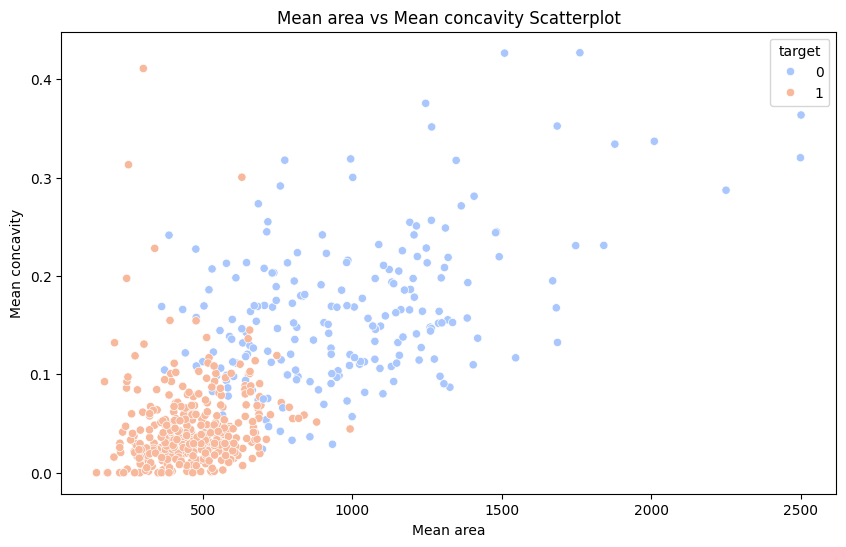

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the breast cancer dataset
data = load_breast_cancer()

# Create a DataFrame from the data
df_breastcancer = pd.DataFrame(data=data.data, columns=data.feature_names)

# Add the target variable to the DataFrame
df_breastcancer['target'] = data.target

# Calculate the correlation between 'mean radius' and 'mean perimeter'
correlation = df_breastcancer['mean area'].corr(df_breastcancer['mean concavity'])
print(f"Correlation between 'mean area' and 'mean concavity': {correlation}")

# Plotting the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_breastcancer,
                x='mean area',
                y='mean concavity',
                hue='target',
                palette='coolwarm')

plt.title('Mean area vs Mean concavity Scatterplot')
plt.xlabel('Mean area')
plt.ylabel('Mean concavity')
plt.show()


- Cluster of Malignant Tumors: The malignant tumors (orange points) seem to cluster at the lower left, where both mean area and mean concavity are relatively small. This suggests that smaller tumors tend to have lower concavity and are more likely to be malignant.

- Spread of Benign Tumors: The benign tumors (blue points) are more spread out and dominate at higher values of mean area and concavity, indicating that larger tumors tend to have higher concavity and are more likely to be benign.

- General Trend: As the mean area increases, the mean concavity also tends to increase, particularly for benign tumors.

# Baseline Regression KBEST

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, f1_score, roc_curve, auc

# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()

# Split the data into features (X) and target variable (y)
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.956140350877193


- The baseline logistic for the breast cancer dataset is 95.61%.

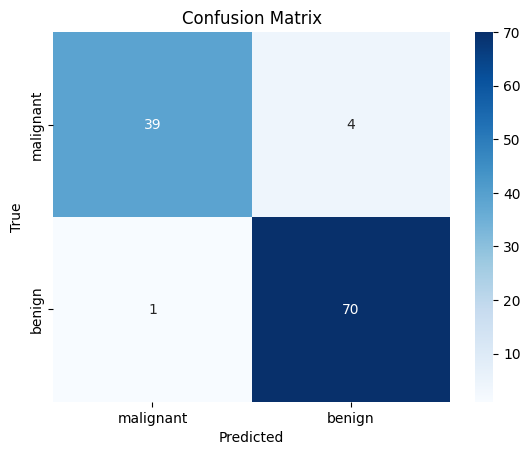

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

- The baseline regression for KBest shows that there is 1 benign tumor which was predicted as malignant.
- Three tumors that were actually malignant (cancerous) were incorrectly classified as benign. This is more concerning in a medical context because a malignant tumor classified as benign could delay crucial cancer treatment, allowing the tumor to grow and potentially metastasize.

#Analysis of Features using KBest

# K30

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()

# Convert the data into a DataFrame
import pandas as pd
df_breastcancer = pd.DataFrame(data.data, columns=data.feature_names)
df_breastcancer['target'] = data.target

# Separate features and target variable
X = df_breastcancer.drop(columns=['target'])  # Features
y = df_breastcancer['target']  # Target

# Feature selection with SelectKBest (k=11) using the chi2 scoring function
k = 30
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)  # Transform the data based on selected features

# Get the selected feature names
selected_indices = selector.get_support(indices=True)
selected_features = [data.feature_names[i] for i in selected_indices]
print("Selected Features:", selected_features)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Build Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Selected Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
Accuracy: 0.956140350877193


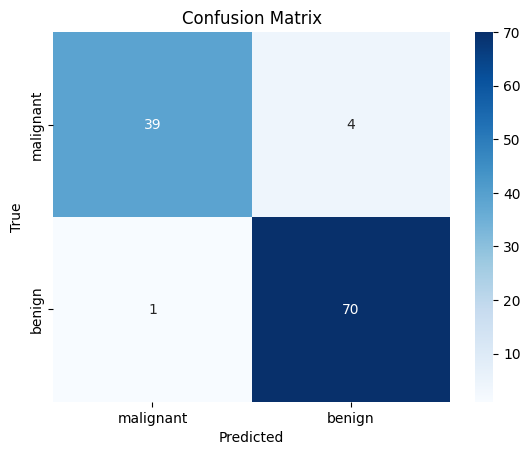

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

# K20

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()

# Convert the data to a DataFrame to make feature selection easier
df_breastcancer = pd.DataFrame(data.data, columns=data.feature_names)
df_breastcancer['target'] = data.target

# Select the features of interest
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean compactness', 'mean concavity', 'mean concave points',
       'radius error', 'perimeter error', 'area error', 'concave points error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry']

X = df_breastcancer[selected_features]  # Use only the selected features
y = df_breastcancer['target']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9649122807017544


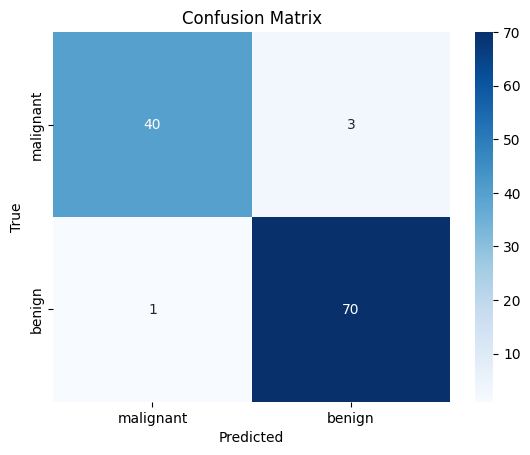

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

##K19

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()

# Convert the data into a DataFrame
import pandas as pd
df_breastcancer = pd.DataFrame(data.data, columns=data.feature_names)
df_breastcancer['target'] = data.target

# Separate features and target variable
X = df_breastcancer.drop(columns=['target'])  # Features
y = df_breastcancer['target']  # Target

# Feature selection with SelectKBest (k=11) using the chi2 scoring function
k = 19
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)  # Transform the data based on selected features

# Get the selected feature names
selected_indices = selector.get_support(indices=True)
selected_features = [data.feature_names[i] for i in selected_indices]
print("Selected Features:", selected_features)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Build Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Selected Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean compactness', 'mean concavity', 'mean concave points', 'radius error', 'perimeter error', 'area error', 'concavity error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry']
Accuracy: 0.9649122807017544


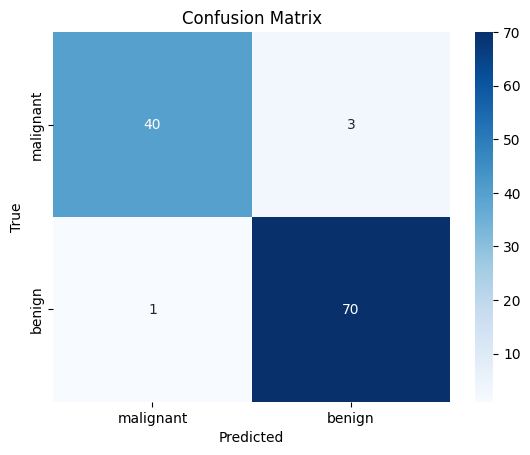

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## K18

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()

# Convert the data into a DataFrame
import pandas as pd
df_breastcancer = pd.DataFrame(data.data, columns=data.feature_names)
df_breastcancer['target'] = data.target

# Separate features and target variable
X = df_breastcancer.drop(columns=['target'])  # Features
y = df_breastcancer['target']  # Target

# Feature selection with SelectKBest (k=11) using the chi2 scoring function
k = 18
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)  # Transform the data based on selected features

# Get the selected feature names
selected_indices = selector.get_support(indices=True)
selected_features = [data.feature_names[i] for i in selected_indices]
print("Selected Features:", selected_features)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Build Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Selected Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean compactness', 'mean concavity', 'mean concave points', 'radius error', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry']
Accuracy: 0.9649122807017544


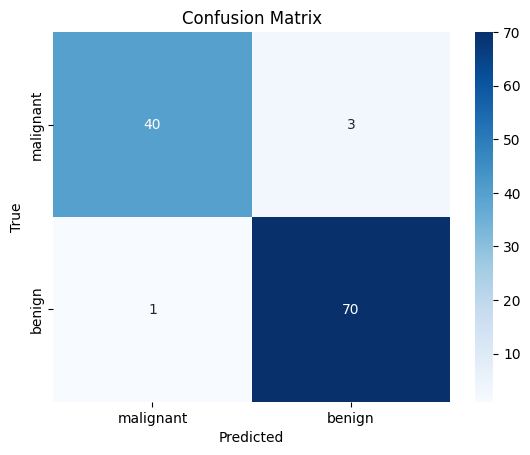

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## K17

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()

# Convert the data into a DataFrame
import pandas as pd
df_breastcancer = pd.DataFrame(data.data, columns=data.feature_names)
df_breastcancer['target'] = data.target

# Separate features and target variable
X = df_breastcancer.drop(columns=['target'])  # Features
y = df_breastcancer['target']  # Target

# Feature selection with SelectKBest (k=11) using the chi2 scoring function
k = 17
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)  # Transform the data based on selected features

# Get the selected feature names
selected_indices = selector.get_support(indices=True)
selected_features = [data.feature_names[i] for i in selected_indices]
print("Selected Features:", selected_features)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Build Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Selected Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean compactness', 'mean concavity', 'mean concave points', 'radius error', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst compactness', 'worst concavity', 'worst concave points']
Accuracy: 0.9649122807017544


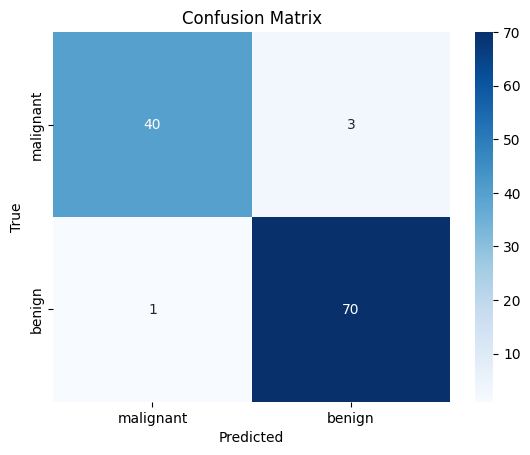

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

##K16

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()

# Convert the data into a DataFrame
import pandas as pd
df_breastcancer = pd.DataFrame(data.data, columns=data.feature_names)
df_breastcancer['target'] = data.target

# Separate features and target variable
X = df_breastcancer.drop(columns=['target'])  # Features
y = df_breastcancer['target']  # Target

# Feature selection with SelectKBest (k=11) using the chi2 scoring function
k = 16
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)  # Transform the data based on selected features

# Get the selected feature names
selected_indices = selector.get_support(indices=True)
selected_features = [data.feature_names[i] for i in selected_indices]
print("Selected Features:", selected_features)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Build Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Selected Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'radius error', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst compactness', 'worst concavity', 'worst concave points']
Accuracy: 0.9649122807017544


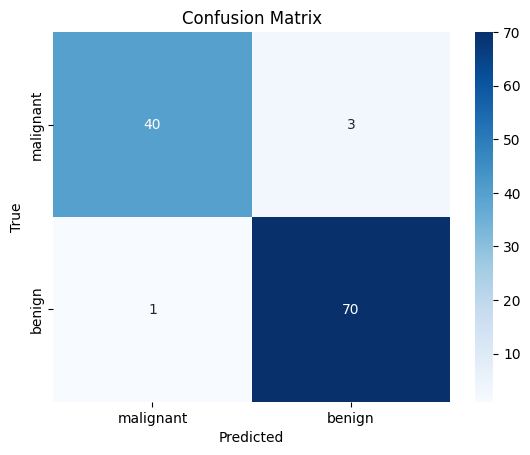

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## K15

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()

# Convert the data into a DataFrame
import pandas as pd
df_breastcancer = pd.DataFrame(data.data, columns=data.feature_names)
df_breastcancer['target'] = data.target

# Separate features and target variable
X = df_breastcancer.drop(columns=['target'])  # Features
y = df_breastcancer['target']  # Target

# Feature selection with SelectKBest (k=11) using the chi2 scoring function
k = 15
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)  # Transform the data based on selected features

# Get the selected feature names
selected_indices = selector.get_support(indices=True)
selected_features = [data.feature_names[i] for i in selected_indices]
print("Selected Features:", selected_features)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Build Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Selected Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean concavity', 'radius error', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst compactness', 'worst concavity', 'worst concave points']
Accuracy: 0.9649122807017544


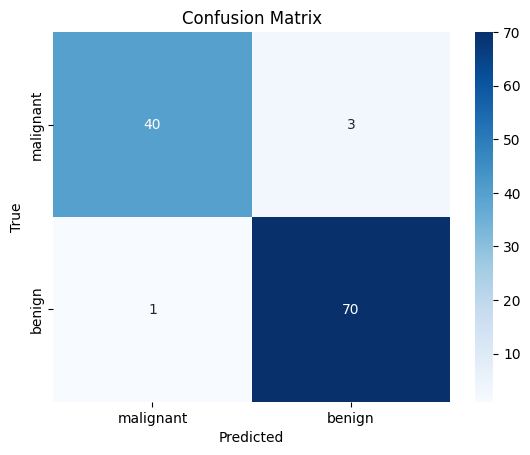

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## K14

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()

# Convert the data into a DataFrame
import pandas as pd
df_breastcancer = pd.DataFrame(data.data, columns=data.feature_names)
df_breastcancer['target'] = data.target

# Separate features and target variable
X = df_breastcancer.drop(columns=['target'])  # Features
y = df_breastcancer['target']  # Target

# Feature selection with SelectKBest (k=11) using the chi2 scoring function
k = 14
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)  # Transform the data based on selected features

# Get the selected feature names
selected_indices = selector.get_support(indices=True)
selected_features = [data.feature_names[i] for i in selected_indices]
print("Selected Features:", selected_features)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Build Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Selected Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean concavity', 'radius error', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst compactness', 'worst concavity']
Accuracy: 0.9649122807017544


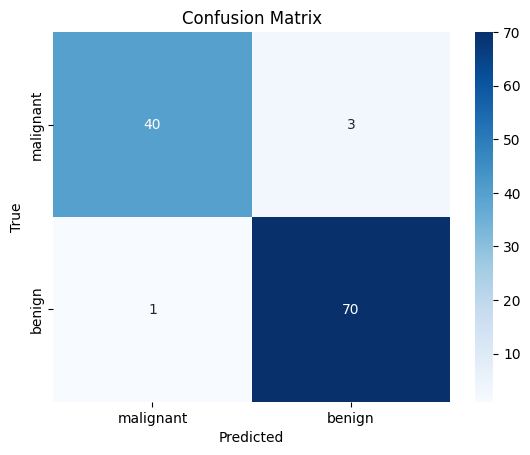

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## K13

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()

# Convert the data into a DataFrame
import pandas as pd
df_breastcancer = pd.DataFrame(data.data, columns=data.feature_names)
df_breastcancer['target'] = data.target

# Separate features and target variable
X = df_breastcancer.drop(columns=['target'])  # Features
y = df_breastcancer['target']  # Target

# Feature selection with SelectKBest (k=11) using the chi2 scoring function
k = 13
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)  # Transform the data based on selected features

# Get the selected feature names
selected_indices = selector.get_support(indices=True)
selected_features = [data.feature_names[i] for i in selected_indices]
print("Selected Features:", selected_features)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Build Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Selected Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean concavity', 'radius error', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst concavity']
Accuracy: 0.9649122807017544


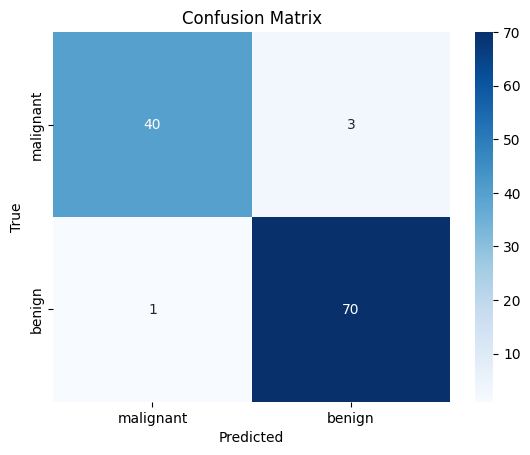

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

##K12

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()

# Convert the data into a DataFrame
import pandas as pd
df_breastcancer = pd.DataFrame(data.data, columns=data.feature_names)
df_breastcancer['target'] = data.target

# Separate features and target variable
X = df_breastcancer.drop(columns=['target'])  # Features
y = df_breastcancer['target']  # Target

# Feature selection with SelectKBest (k=11) using the chi2 scoring function
k = 12
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)  # Transform the data based on selected features

# Get the selected feature names
selected_indices = selector.get_support(indices=True)
selected_features = [data.feature_names[i] for i in selected_indices]
print("Selected Features:", selected_features)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Build Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Selected Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'radius error', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst concavity']
Accuracy: 0.9649122807017544


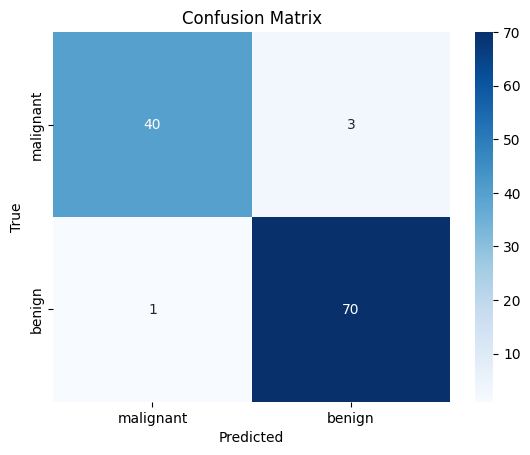

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

##K11

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()

# Convert the data into a DataFrame
import pandas as pd
df_breastcancer = pd.DataFrame(data.data, columns=data.feature_names)
df_breastcancer['target'] = data.target

# Separate features and target variable
X = df_breastcancer.drop(columns=['target'])  # Features
y = df_breastcancer['target']  # Target

# Feature selection with SelectKBest (k=11) using the chi2 scoring function
k = 11
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)  # Transform the data based on selected features

# Get the selected feature names
selected_indices = selector.get_support(indices=True)
selected_features = [data.feature_names[i] for i in selected_indices]
print("Selected Features:", selected_features)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Build Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Selected Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst concavity']
Accuracy: 0.9649122807017544


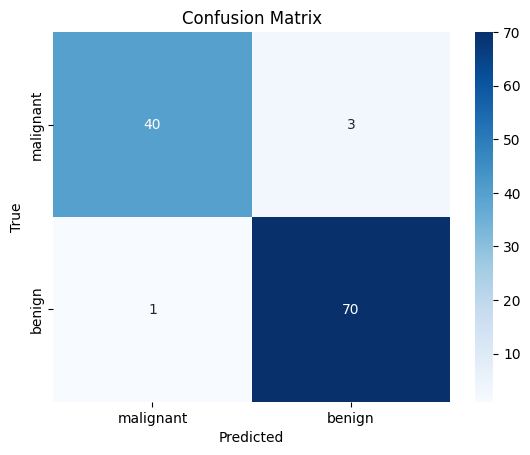

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

# K10

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()

# Convert the data to a DataFrame to make feature selection easier
df_breastcancer = pd.DataFrame(data.data, columns=data.feature_names)
df_breastcancer['target'] = data.target

# Select the features of interest
selected_features = ['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
                     'mean concave points', 'worst radius', 'worst perimeter',
                     'worst area', 'worst concavity', 'worst concave points']

X = df_breastcancer[selected_features]  # Use only the selected features
y = df_breastcancer['target']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.9912280701754386


In [ ]:
print(f"Number of selected features: {len(selected_features)}")


Number of selected features: 10


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()

# Convert the data into a DataFrame
import pandas as pd
df_breastcancer = pd.DataFrame(data.data, columns=data.feature_names)
df_breastcancer['target'] = data.target

# Separate features and target variable
X = df_breastcancer.drop(columns=['target'])  # Features
y = df_breastcancer['target']  # Target

# Feature selection with SelectKBest (k=11) using the chi2 scoring function
k = 10  # Number of features to select
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)  # Transform the data based on selected features

# Get the selected feature names
selected_indices = selector.get_support(indices=True)
selected_features = [data.feature_names[i] for i in selected_indices]
print("Selected Features:", selected_features)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Build Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Selected Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area']
Accuracy: 0.9649122807017544


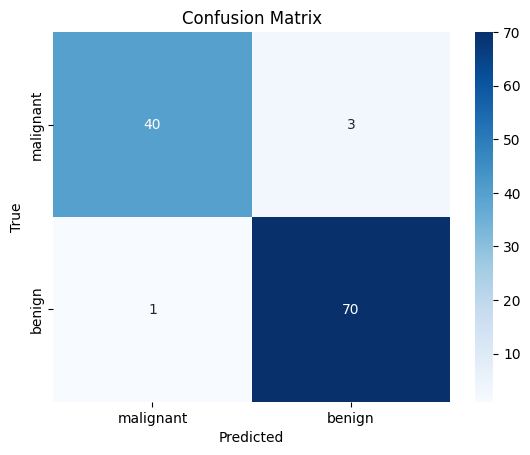

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## K9

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()

# Convert the data into a DataFrame
import pandas as pd
df_breastcancer = pd.DataFrame(data.data, columns=data.feature_names)
df_breastcancer['target'] = data.target

# Separate features and target variable
X = df_breastcancer.drop(columns=['target'])  # Features
y = df_breastcancer['target']  # Target

# Feature selection with SelectKBest (k=11) using the chi2 scoring function
k = 9  # Number of features to select
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)  # Transform the data based on selected features

# Get the selected feature names
selected_indices = selector.get_support(indices=True)
selected_features = [data.feature_names[i] for i in selected_indices]
print("Selected Features:", selected_features)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Build Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Selected Features: ['mean radius', 'mean perimeter', 'mean area', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area']
Accuracy: 0.9649122807017544


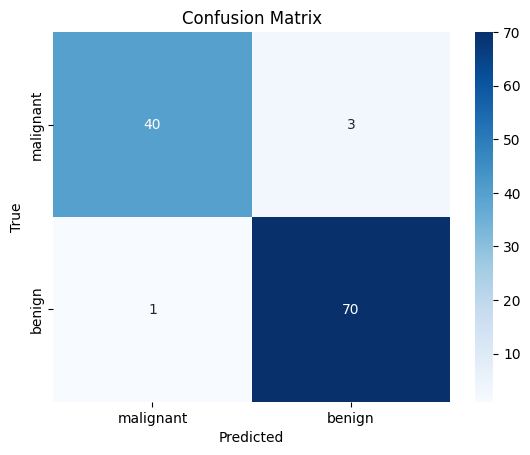

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## K8

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()

# Convert the data into a DataFrame
import pandas as pd
df_breastcancer = pd.DataFrame(data.data, columns=data.feature_names)
df_breastcancer['target'] = data.target

# Separate features and target variable
X = df_breastcancer.drop(columns=['target'])  # Features
y = df_breastcancer['target']  # Target

# Feature selection with SelectKBest (k=11) using the chi2 scoring function
k = 8
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)  # Transform the data based on selected features

# Get the selected feature names
selected_indices = selector.get_support(indices=True)
selected_features = [data.feature_names[i] for i in selected_indices]
print("Selected Features:", selected_features)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Build Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Selected Features: ['mean radius', 'mean perimeter', 'mean area', 'perimeter error', 'area error', 'worst radius', 'worst perimeter', 'worst area']
Accuracy: 0.9736842105263158


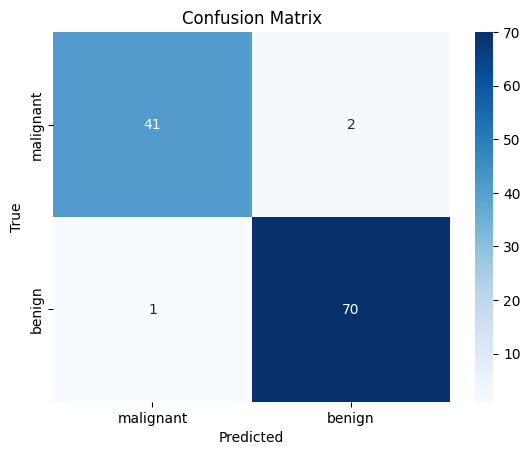

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## K7

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()

# Convert the data into a DataFrame
import pandas as pd
df_breastcancer = pd.DataFrame(data.data, columns=data.feature_names)
df_breastcancer['target'] = data.target

# Separate features and target variable
X = df_breastcancer.drop(columns=['target'])  # Features
y = df_breastcancer['target']  # Target

# Feature selection with SelectKBest (k=11) using the chi2 scoring function
k = 7
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)  # Transform the data based on selected features

# Get the selected feature names
selected_indices = selector.get_support(indices=True)
selected_features = [data.feature_names[i] for i in selected_indices]
print("Selected Features:", selected_features)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Build Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Selected Features: ['mean radius', 'mean perimeter', 'mean area', 'area error', 'worst radius', 'worst perimeter', 'worst area']
Accuracy: 0.9824561403508771


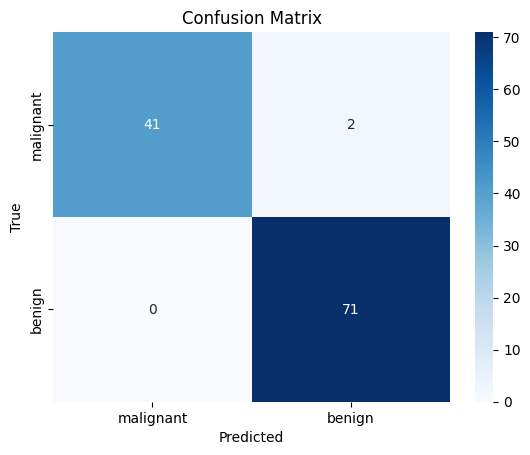

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

- False Positives (Benign Misclassified as Malignant):
There were 0 benign tumors misclassified as malignant, which means the model was very precise in distinguishing benign tumors.

- False Negatives (Malignant Misclassified as Benign):
The model misclassified 2 malignant tumors as benign. These are the cases where cancerous tumors were incorrectly predicted to be non-cancerous.


## K6

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()

# Convert the data into a DataFrame
import pandas as pd
df_breastcancer = pd.DataFrame(data.data, columns=data.feature_names)
df_breastcancer['target'] = data.target

# Separate features and target variable
X = df_breastcancer.drop(columns=['target'])  # Features
y = df_breastcancer['target']  # Target

# Feature selection with SelectKBest (k=11) using the chi2 scoring function
k = 6
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)  # Transform the data based on selected features

# Get the selected feature names
selected_indices = selector.get_support(indices=True)
selected_features = [data.feature_names[i] for i in selected_indices]
print("Selected Features:", selected_features)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Build Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Selected Features: ['mean perimeter', 'mean area', 'area error', 'worst radius', 'worst perimeter', 'worst area']
Accuracy: 0.9736842105263158


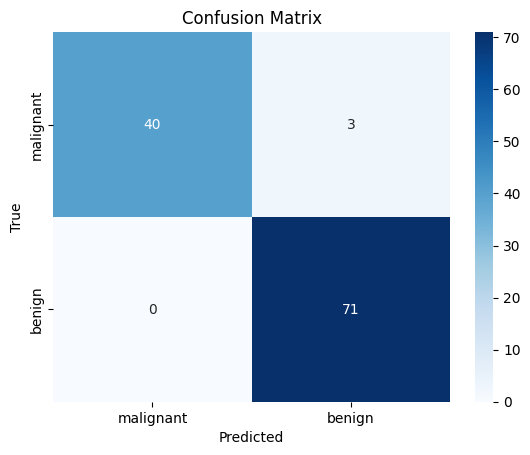

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## K5

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()

# Convert the data into a DataFrame
import pandas as pd
df_breastcancer = pd.DataFrame(data.data, columns=data.feature_names)
df_breastcancer['target'] = data.target

# Separate features and target variable
X = df_breastcancer.drop(columns=['target'])  # Features
y = df_breastcancer['target']  # Target

# Feature selection with SelectKBest (k=11) using the chi2 scoring function
k = 5
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)  # Transform the data based on selected features

# Get the selected feature names
selected_indices = selector.get_support(indices=True)
selected_features = [data.feature_names[i] for i in selected_indices]
print("Selected Features:", selected_features)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Build Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Selected Features: ['mean perimeter', 'mean area', 'area error', 'worst perimeter', 'worst area']
Accuracy: 0.9736842105263158


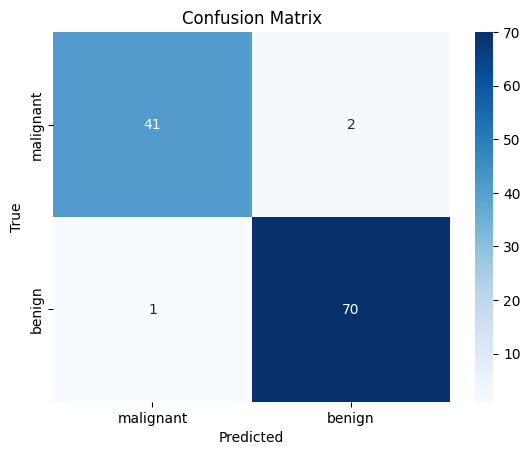

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## K4

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()

# Convert the data into a DataFrame
import pandas as pd
df_breastcancer = pd.DataFrame(data.data, columns=data.feature_names)
df_breastcancer['target'] = data.target

# Separate features and target variable
X = df_breastcancer.drop(columns=['target'])  # Features
y = df_breastcancer['target']  # Target

# Feature selection with SelectKBest (k=11) using the chi2 scoring function
k = 4
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)  # Transform the data based on selected features

# Get the selected feature names
selected_indices = selector.get_support(indices=True)
selected_features = [data.feature_names[i] for i in selected_indices]
print("Selected Features:", selected_features)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Build Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Selected Features: ['mean area', 'area error', 'worst perimeter', 'worst area']
Accuracy: 0.9736842105263158


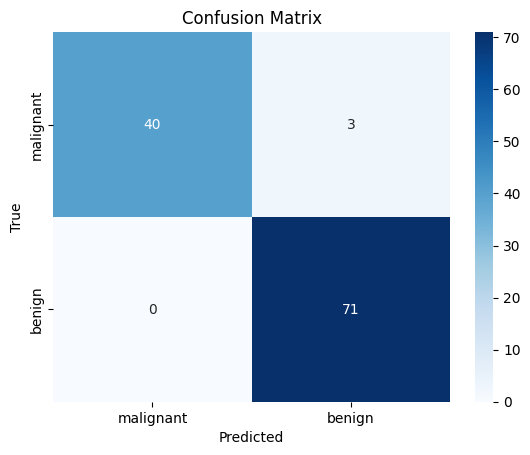

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## K3

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()

# Convert the data into a DataFrame
import pandas as pd
df_breastcancer = pd.DataFrame(data.data, columns=data.feature_names)
df_breastcancer['target'] = data.target

# Separate features and target variable
X = df_breastcancer.drop(columns=['target'])  # Features
y = df_breastcancer['target']  # Target

# Feature selection with SelectKBest (k=11) using the chi2 scoring function
k = 3
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)  # Transform the data based on selected features

# Get the selected feature names
selected_indices = selector.get_support(indices=True)
selected_features = [data.feature_names[i] for i in selected_indices]
print("Selected Features:", selected_features)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Build Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Selected Features: ['mean area', 'area error', 'worst area']
Accuracy: 0.9736842105263158


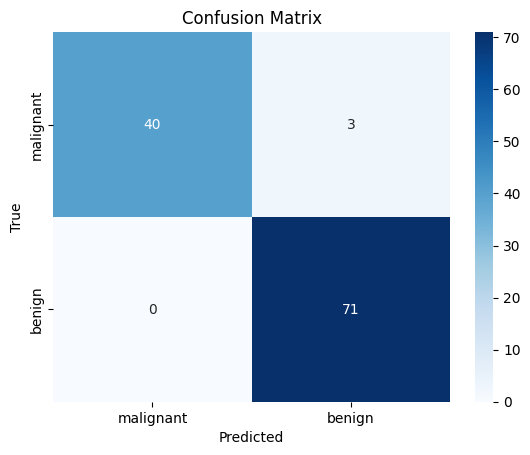

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


## K2

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()

# Convert the data into a DataFrame
import pandas as pd
df_breastcancer = pd.DataFrame(data.data, columns=data.feature_names)
df_breastcancer['target'] = data.target

# Separate features and target variable
X = df_breastcancer.drop(columns=['target'])  # Features
y = df_breastcancer['target']  # Target

# Feature selection with SelectKBest (k=11) using the chi2 scoring function
k = 2
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)  # Transform the data based on selected features

# Get the selected feature names
selected_indices = selector.get_support(indices=True)
selected_features = [data.feature_names[i] for i in selected_indices]
print("Selected Features:", selected_features)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Build Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Selected Features: ['mean area', 'worst area']
Accuracy: 0.9649122807017544


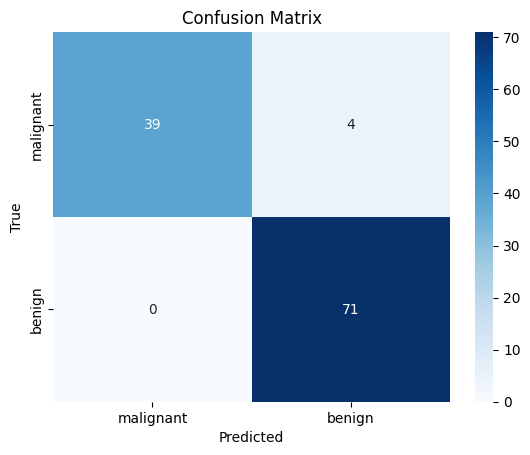

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## K1

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()

# Convert the data into a DataFrame
import pandas as pd
df_breastcancer = pd.DataFrame(data.data, columns=data.feature_names)
df_breastcancer['target'] = data.target

# Separate features and target variable
X = df_breastcancer.drop(columns=['target'])  # Features
y = df_breastcancer['target']  # Target

# Feature selection with SelectKBest (k=11) using the chi2 scoring function
k = 1
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)  # Transform the data based on selected features

# Get the selected feature names
selected_indices = selector.get_support(indices=True)
selected_features = [data.feature_names[i] for i in selected_indices]
print("Selected Features:", selected_features)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Build Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Selected Features: ['worst area']
Accuracy: 0.9385964912280702


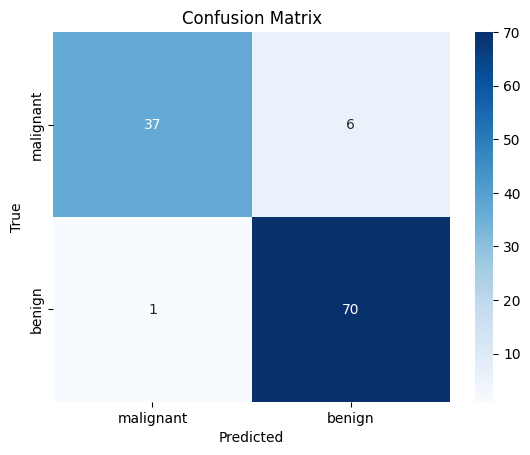

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='macro')  # Use 'macro' for multi-class classification
print("F1 Score:", f1)

F1 Score: 0.9329805996472664


- We can't have malignant getting predicted as benign
- As well as checking the accuracy keep this in mind.
- it is ok for benign to be predicted as malignant
- In this specific case study, I wnat you to reduce the number of malignants getting predicted as benigns

# Analysis of KBest Features

1. **Baseline Accuracy with KBest (All Features):**
Initially, the model was run using all available features selected by the KBest method.
The baseline accuracy achieved was 0.9561.

2. Experimenting with Fewer Features:
To improve the model's accuracy, I conducted experiments by reducing the number of selected features using the KBest method:

**K = 30 Features:**

The model was run with 30 features.
The accuracy remained the same as the baseline, i.e., 0.9561. This suggested that the additional features beyond the most relevant ones may not contribute significantly to improving model performance.

**K = 20 Features:**
Reducing the number of selected features to 20 led to a slight increase in accuracy to 0.9649.
This increase indicated that removing some of the less important features helped the model focus on more relevant data, improving its predictive power.

**K = 10 Features:**
Further reducing the features to the top 10 yielded a significant jump in accuracy to 0.9912.
This showed that with fewer, more carefully selected features, the model was able to achieve better results by minimizing noise and focusing on the most important predictors.

3. Further Analysis for Features Below K=10:
After noticing a considerable accuracy improvement with 10 features, I decided to further analyze models with fewer features to potentially achieve even higher accuracy.
Observing that the model had shown a slight improvement at 20 features, I also decided to test feature sets smaller than 20 to better understand the relationship between feature count and accuracy.

4. Best KBest Feature Selection:
After running various iterations, I discovered that selecting the top 7 features (K=7) produced the best results.
The accuracy for this configuration was 0.9825, which was higher than the baseline accuracy of 0.9561.

5. This result demonstrated that using fewer but more relevant features can lead to higher accuracy, as the model is less likely to be overfitting or impacted by irrelevant data.

***According to the KBest feature selection with K = 7, the most important features contributing to the model's improved accuracy are:***

- **mean radius**
- **mean perimeter**
- **mean area**
- **area error**
- **worst radius**
- **worst perimeter**
- **worst area**

**Confusion Matrix:**
- The low number of false negatives (2) and zero false positives indicate that the model is both precise and sensitive in predicting malignant and benign tumors.
- However, the presence of false negatives is critical in cancer diagnosis, as these represent malignant cases that were missed. In real-world applications, further optimization might be needed to minimize these types of errors.


# Confusion Matrix Intrepretations

**K= 30**

In this case, there were 1 tumor that was benign, but predicted as malignant. There are 4 malignant tumors that were predicted as benign.

**K = 20**
In this case, there were 1 tumor that was benign, but predicted as malignant. There are 3 malignant tumors that were predicted as benign.

**K = 10**
In this case, there were 1 tumor that was benign, but predicted as malignant. There are 3 malignant tumors that were predicted as benign. This is similar to K=20 which shows that there slight decrease in magligant tumors being predicted at benign but still raises concerns in medical examination/tumor classifcation. Therefore looking at K features below 10 would be good to see if find fewer features with higher accuracy to not misidentify tumors.


**K = 7:**
Confusion Matrix:
- The low number of false negatives (2) and zero false positives indicate that the model is both precise and sensitive in predicting malignant and benign tumors.
- However, the presence of false negatives is critical in cancer diagnosis, as these represent malignant cases that were missed. In real-world applications, further optimization might be needed to minimize these types of errors.


# LASSO of Features

- I performed feature selection using Lasso regression with an alpha value between 5% and 10% on the breast cancer dataset. The purpose of adjusting alpha was to analyze how the strength of regularization impacts the accuracy of the model and which features are selected.

- Lasso has chosen these five features ('mean area', 'area error', 'worst texture', 'worst perimeter', 'worst area') as the most relevant for predicting whether a tumor is malignant or benign. By setting many coefficients to zero (thus eliminating less important features), Lasso helps to reduce overfitting and focuses only on the features with the strongest impact on the target variable.

- The Lasso has 4 malignant tumors that were predicted as benign, while KBest has 3 malignant tumors predicted as benign. The both have 1 tumor predicted as malignant.

## Lasso Regression: Alpha = 0.10

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()

# Convert the data into a DataFrame
df_breastcancer = pd.DataFrame(data.data, columns=data.feature_names)
df_breastcancer['target'] = data.target

# Separate features and target variable
X = df_breastcancer.drop(columns=['target'])  # Features
y = df_breastcancer['target']  # Target

# Apply LASSO regression
lasso = Lasso(alpha=0.10)  # Set the regularization strength (alpha) according to your needs
lasso.fit(X,y)

# Get the non-zero coefficients and their corresponding feature names
non_zero_coefficients = lasso.coef_
feature_names = data.feature_names

# Retrieve the selected features
selected_features = [feature_names[i] for i, coef in enumerate(non_zero_coefficients) if coef != 0]

# Print the selected features
print("Selected Features:", selected_features)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Selected Features: ['mean area', 'area error', 'worst texture', 'worst perimeter', 'worst area']
Accuracy: 93.86%


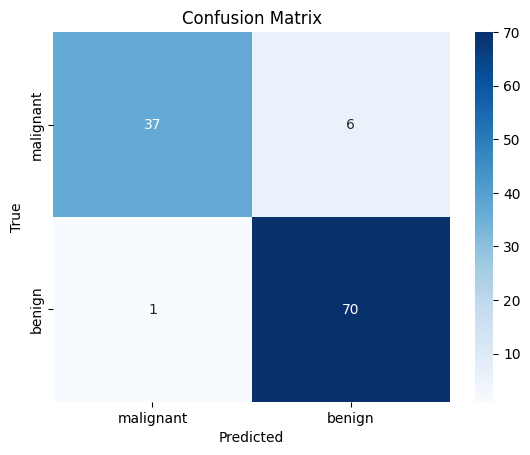

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## Lasso Regression: Alpha= 0.09

In [ ]:
# Apply LASSO regression
lasso = Lasso(alpha=0.09)  # Set the regularization strength (alpha) according to your needs
lasso.fit(X,y)

# Get the non-zero coefficients and their corresponding feature names
non_zero_coefficients = lasso.coef_
feature_names = data.feature_names

# Retrieve the selected features
selected_features = [feature_names[i] for i, coef in enumerate(non_zero_coefficients) if coef != 0]

# Print the selected features
print("Selected Features:", selected_features)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")



Selected Features: ['mean area', 'area error', 'worst texture', 'worst perimeter', 'worst area']
Accuracy: 93.86%


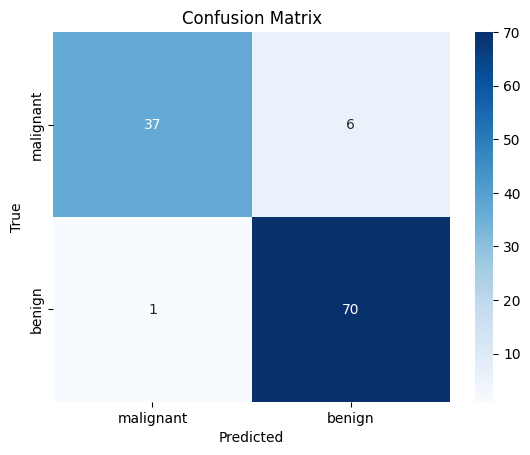

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## Lasso Regression: Alpha =0.08

In [ ]:
# Apply LASSO regression
lasso = Lasso(alpha=0.08)  # Set the regularization strength (alpha) according to your needs
lasso.fit(X,y)

# Get the non-zero coefficients and their corresponding feature names
non_zero_coefficients = lasso.coef_
feature_names = data.feature_names

# Retrieve the selected features
selected_features = [feature_names[i] for i, coef in enumerate(non_zero_coefficients) if coef != 0]

# Print the selected features
print("Selected Features:", selected_features)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")



Selected Features: ['mean area', 'area error', 'worst texture', 'worst perimeter', 'worst area']
Accuracy: 93.86%


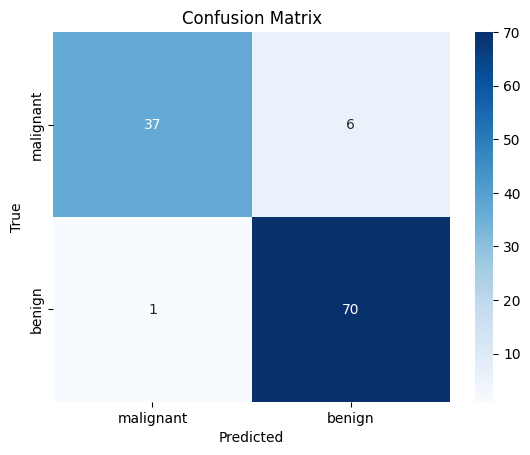

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## Lasso Regression: Alpha =0.07

In [ ]:
# Apply LASSO regression
lasso = Lasso(alpha=0.07)  # Set the regularization strength (alpha) according to your needs
lasso.fit(X,y)

# Get the non-zero coefficients and their corresponding feature names
non_zero_coefficients = lasso.coef_
feature_names = data.feature_names

# Retrieve the selected features
selected_features = [feature_names[i] for i, coef in enumerate(non_zero_coefficients) if coef != 0]

# Print the selected features
print("Selected Features:", selected_features)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")



Selected Features: ['mean area', 'area error', 'worst texture', 'worst perimeter', 'worst area']
Accuracy: 93.86%


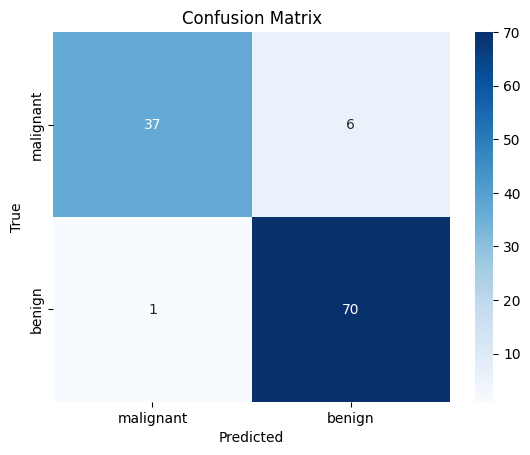

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## Lasso Regression: Alpha = 0.06

In [ ]:
# Apply LASSO regression
lasso = Lasso(alpha=0.06)  # Set the regularization strength (alpha) according to your needs
lasso.fit(X,y)

# Get the non-zero coefficients and their corresponding feature names
non_zero_coefficients = lasso.coef_
feature_names = data.feature_names

# Retrieve the selected features
selected_features = [feature_names[i] for i, coef in enumerate(non_zero_coefficients) if coef != 0]

# Print the selected features
print("Selected Features:", selected_features)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")



Selected Features: ['mean area', 'area error', 'worst texture', 'worst perimeter', 'worst area']
Accuracy: 93.86%


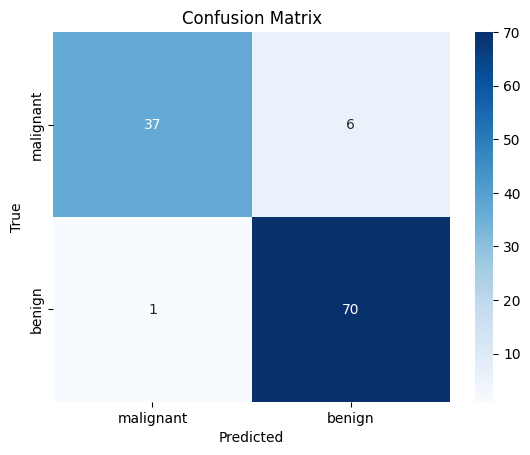

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## Lasso Regression: Alpha = 0.05

In [ ]:
# Apply LASSO regression
lasso = Lasso(alpha=0.05)  # Set the regularization strength (alpha) according to your needs
lasso.fit(X,y)

# Get the non-zero coefficients and their corresponding feature names
non_zero_coefficients = lasso.coef_
feature_names = data.feature_names

# Retrieve the selected features
selected_features = [feature_names[i] for i, coef in enumerate(non_zero_coefficients) if coef != 0]

# Print the selected features
print("Selected Features:", selected_features)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")



Selected Features: ['mean area', 'area error', 'worst texture', 'worst perimeter', 'worst area']
Accuracy: 93.86%


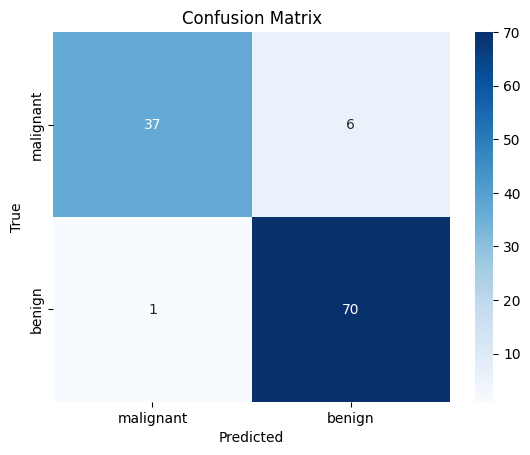

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## Lasso Regression:  Alpha= 0.20

In [ ]:
# Apply LASSO regression
lasso = Lasso(alpha=0.20)  # Set the regularization strength (alpha) according to your needs
lasso.fit(X,y)

# Get the non-zero coefficients and their corresponding feature names
non_zero_coefficients = lasso.coef_
feature_names = data.feature_names

# Retrieve the selected features
selected_features = [feature_names[i] for i, coef in enumerate(non_zero_coefficients) if coef != 0]

# Print the selected features
print("Selected Features:", selected_features)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.4f}%")


Selected Features: ['mean area', 'worst texture', 'worst perimeter', 'worst area']
Accuracy: 93.8596%


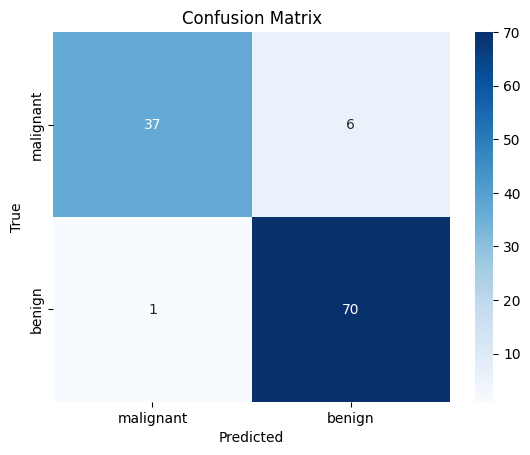

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## Lasso Regression: Alpha = 0.50

In [ ]:
# Apply LASSO regression
lasso = Lasso(alpha=0.50)  # Set the regularization strength (alpha) according to your needs
lasso.fit(X,y)

# Get the non-zero coefficients and their corresponding feature names
non_zero_coefficients = lasso.coef_
feature_names = data.feature_names

# Retrieve the selected features
selected_features = [feature_names[i] for i, coef in enumerate(non_zero_coefficients) if coef != 0]

# Print the selected features
print("Selected Features:", selected_features)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.4f}%")


Selected Features: ['mean area', 'worst texture', 'worst perimeter']
Accuracy: 93.8596%


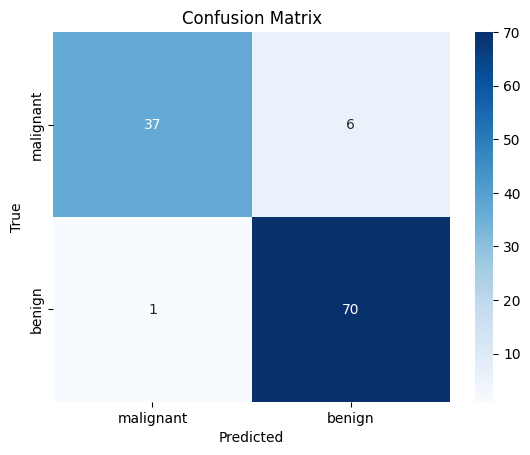

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## Regression of Lasso

In [ ]:
#Split the data into features (X) and target variable (y)
X = df_breastcancer[['mean area', 'area error', 'worst texture', 'worst perimeter', 'worst area']]
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.49%


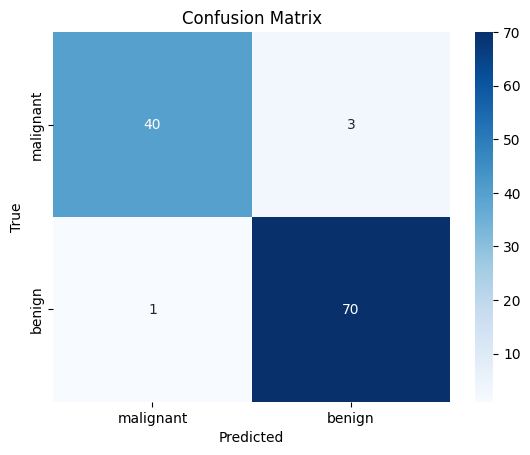

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

# Analysis of Lasso

The accuracy of the model remained consistent at 93.86% for both alpha values (5% and 10%). This indicates that the model's predictive performance was stable within this range of alpha values, without any noticeable improvement or degradation.
Selected Features:

The same set of features was selected for both alpha values:
'mean area'
'area error'
'worst texture'
'worst perimeter'
'worst area'
These features remained consistent between 5% and 10% alpha, suggesting that they are critical for tumor classification and robust against small changes in regularization strength.


**Further analysis**

- For further analysis of the Lasso Regression I decided to run an alpha for 20% and 50% if there was any imporovement to the model, but increasing the alpha gave me the same accuracy of 93.86% from the alpha models between 0.05 - 0.10%.

- At 20%, the number of features decreased to 4 features, which were mean area, worst texture, worst perimeter and worst area. Same accuracy between 5% -10%% but fewer features.
- At 50%, the number of features decreased to 3, which were mean area, worst texture and worst perimeter. Accuracy of 93.8596%.

**Overall Analysis:**
- Between alpha 5% and 10%. The accuracy is  93.86% which better than the baseline regression of lasso for df_breastcancer dataset. The number of malignant tumors that were predicted as benign decrease from 4 to 3, which shows a slight improvement within the model.

**Conclusion:**

- The best model for Lasso Regression is Alpha = 0.05 - 0.10 which have the same features:
'mean area'
'area error'
'worst texture'
'worst perimeter'
'worst area'

They all had an accuracy of 93.86%.




# Compare Kbest vs Lasso Regression

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()

# Convert the data into a DataFrame
df_breastcancer = pd.DataFrame(data.data, columns=data.feature_names)
df_breastcancer['target'] = data.target

# Separate features and target variable
X = df_breastcancer.drop(columns=['target'])  # Features
y = df_breastcancer['target']  # Target

# Feature selection with SelectKBest (k=7) using the chi2 scoring function
k = 7
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)  # Transform the data based on selected features

# Get the selected feature names
selected_indices = selector.get_support(indices=True)
selected_features = [data.feature_names[i] for i in selected_indices]
print("Selected Features (KBest):", selected_features)

# Splitting data into training and testing sets for KBest selected features
X_train_kbest, X_test_kbest, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Build Logistic Regression model for KBest selected features
model_kbest = LogisticRegression(max_iter=10000)
model_kbest.fit(X_train_kbest, y_train)

# Make predictions and evaluate for KBest selected features
y_pred_kbest = model_kbest.predict(X_test_kbest)
accuracy_kbest = accuracy_score(y_test, y_pred_kbest)
print(f"Accuracy (KBest): {accuracy_kbest * 100:.2f}%")
print("Confusion Matrix (KBest):\n", confusion_matrix(y_test, y_pred_kbest))
print("Classification Report (KBest):\n", classification_report(y_test, y_pred_kbest))

# Manually selected features for comparison
X_manual = df_breastcancer[['mean area', 'area error', 'worst texture', 'worst perimeter', 'worst area']]

# Splitting data into training and testing sets for manually selected features
X_train_manual, X_test_manual, y_train, y_test = train_test_split(X_manual, y, test_size=0.2, random_state=42)

# Build Logistic Regression model for manually selected features
model_manual = LogisticRegression(max_iter=10000)
model_manual.fit(X_train_manual, y_train)

# Make predictions and evaluate for manually selected features
y_pred_manual = model_manual.predict(X_test_manual)
accuracy_manual = accuracy_score(y_test, y_pred_manual)
print(f"\nAccuracy (Manual): {accuracy_manual * 100:.2f}%")
print("Confusion Matrix (Manual):\n", confusion_matrix(y_test, y_pred_manual))
print("Classification Report (Manual):\n", classification_report(y_test, y_pred_manual))


Selected Features (KBest): ['mean radius', 'mean perimeter', 'mean area', 'area error', 'worst radius', 'worst perimeter', 'worst area']
Accuracy (KBest): 98.25%
Confusion Matrix (KBest):
 [[41  2]
 [ 0 71]]
Classification Report (KBest):
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Accuracy (Manual): 96.49%
Confusion Matrix (Manual):
 [[40  3]
 [ 1 70]]
Classification Report (Manual):
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


For K = 7 the features were:
- **mean radius**
- **mean perimeter**
- **mean area**
- **area error**
- **worst radius**
- **worst perimeter**
- **worst area**

The Lasso Features:
- **mean area'**
- **area error'**
- **worst texture'**
- **worst perimeter'**
- **worst area'**


Strengths of KBest:
- KBest delivered higher accuracy compared to Lasso, at 98.25%.
It selected a set of 7 features that capture the size and shape characteristics of tumors, which appear to be very effective for prediction.
Simplicity: The feature selection is focused on a small, relevant subset of features that perform well in classification.

Strengths of Lasso:
- It had regression accuracy of 96.46%, considering that running alpha between 5% and 10% produced similar features and accuracies.
- The accuracy is lower than KBest (98.25%), but Lasso reduces overfitting and might perform better on a broader variety of datasets.
Lasso uses fewer features (5 features compared to KBest's 7), which might make the model more interpretable and less prone to overfitting.





**Conclusion**

K= 7, is a better model as there is less misclassification of malignant tumors being predicted as benign. It has a higher accuracy of 98.25% than Lasso with a accuracy of 93.86%.

In the confusion matrix, K=7, has only 2 tumors that are malignant that were classified as benign and Lasso has 3 tumors that are malignant but classified as benign. Vice versa in K=7, there are 0 tumors are benign that were predicted as malignant, while Lasso has 1 tumor which is benign but predicted as malignant.

Given that misclassifying malignant tumors as benign is more dangerous in a medical context, K=7 seems to be the better choice because it reduces the risk of such errors while achieving a higher overall accuracy.


# Combined K7 and Lasso Feature Selection Regression Model

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()

# Convert the data into a DataFrame
df_breastcancer = pd.DataFrame(data.data, columns=data.feature_names)
df_breastcancer['target'] = data.target

# Separate features and target variable
X = df_breastcancer.drop(columns=['target'])  # Features
y = df_breastcancer['target']  # Target

# SelectKBest (k=7) using the chi2 scoring function
k = 7
selector = SelectKBest(score_func=chi2, k=k)
X_kbest = selector.fit_transform(X, y)  # Transform the data based on selected features

# Get the selected KBest feature names
selected_indices_kbest = selector.get_support(indices=True)
selected_features_kbest = [data.feature_names[i] for i in selected_indices_kbest]
print("Selected Features (KBest):", selected_features_kbest)

# Lasso-selected features
selected_features_lasso = ['mean area', 'area error', 'worst texture', 'worst perimeter', 'worst area']
print("Selected Features (Lasso):", selected_features_lasso)

# Combine KBest and Lasso-selected features (ensure no duplicate columns)
combined_features = list(set(selected_features_kbest + selected_features_lasso))
print("Combined Features:", combined_features)

# Create a new dataset with the combined features
X_combined = df_breastcancer[combined_features]

# Splitting data into training and testing sets for the combined features
X_train_combined, X_test_combined, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Build Logistic Regression model using combined features
model_combined = LogisticRegression(max_iter=10000)
model_combined.fit(X_train_combined, y_train)

# Make predictions on the testing set
y_pred_combined = model_combined.predict(X_test_combined)

# Evaluate the model
accuracy_combined = accuracy_score(y_test, y_pred_combined)
print(f"\nAccuracy (Combined features): {accuracy_combined * 100:.2f}%")
print("Confusion Matrix (Combined features):\n", confusion_matrix(y_test, y_pred_combined))
print("Classification Report (Combined features):\n", classification_report(y_test, y_pred_combined))


Selected Features (KBest): ['mean radius', 'mean perimeter', 'mean area', 'area error', 'worst radius', 'worst perimeter', 'worst area']
Selected Features (Lasso): ['mean area', 'area error', 'worst texture', 'worst perimeter', 'worst area']
Combined Features: ['area error', 'mean perimeter', 'mean radius', 'worst area', 'mean area', 'worst texture', 'worst perimeter', 'worst radius']

Accuracy (Combined features): 96.49%
Confusion Matrix (Combined features):
 [[40  3]
 [ 1 70]]
Classification Report (Combined features):
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



- KBest Model: The KBest model had an accuracy of 98.25%, slightly higher than the combined model's 96.49%. It had fewer misclassifications, particularly for malignant tumors (2 FN in KBest vs. 1 FN in the combined model).

- Combined Model: The combined model still performs well, especially in terms of identifying malignant tumors (with only 1 FN). It adds value by integrating Lasso's texture feature while preserving the other key tumor measurements from KBest, which could give it greater generalizability in some cases. However, this comes at a cost of more false positives (3 FP), potentially leading to more benign tumors being flagged as malignant.


# Final Intrepretation

Based on the results, the SelectKBest (k=7) model demonstrates superior performance compared to both the Lasso regression model and the combined Lasso + KBest feature model.

The KBest model achieves a higher accuracy of 98.25% and has fewer misclassifications, particularly when it comes to malignant tumors, which is critical in cancer diagnosis. It resulted in only 2 false negatives (malignant tumors incorrectly classified as benign) and no false positives (benign tumors misclassified as malignant). This makes the KBest model particularly effective in minimizing errors that could lead to missed diagnoses or unnecessary treatments.



In [ ]:
# Split the data into features (X) and target variable (y)
X = df_breastcancer[['mean radius', 'mean perimeter', 'worst radius']]
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 98.25%


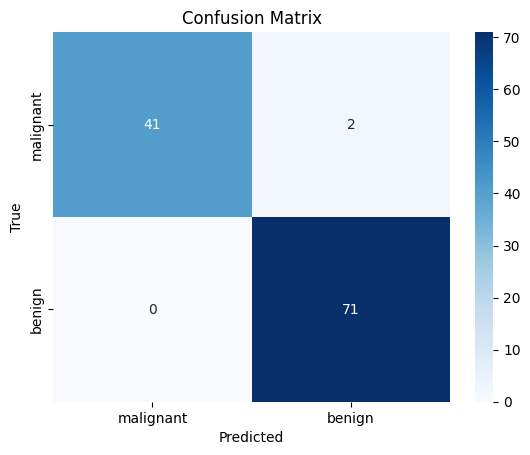

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

- After seeing the features within the K=7, as being the best model, I built a model with Mean raduis, mean perimeter and worst raduis, which had the same accuracy of 98.25% as the K=7. In this model there are 3 features, therefore this is the best model. T

- Also fewer misclassifications similar to K=7, as resulted to 2 false negatives and 0 false positives.